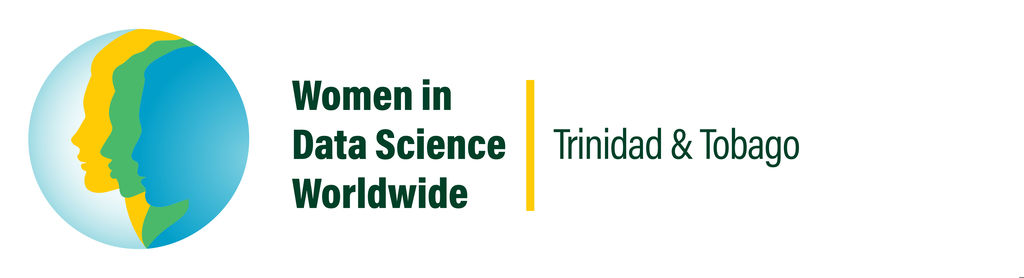

# **WORKSHOP 1**

# **Mastering Data Analysis: From Data Loading to Exploratory Data Analysis**



**Requirements**
1. [Google account](https://www.gmail.com)
2. [Kaggle account](https://www.kaggle.com/account/login?phase=startRegisterTab&returnUrl=%2F)
3. Kaggle JSON API Key

**WORKSHOP 1**

1) Import WiDS Datathon 2025

2) Data Loading, Inspection, and Merging for Analysis

3) Assess Data Quality and Initial Exploration

4) Exploratory Data Analysis

4.1) Univariate Analysis

4.2) Explore Target Variables

4.3) Bivariate Analysis

4.4) Multivariate Analysis







**GOOGLE COLAB BASICS**

Colab notebooks consist of **cells** that can contain either **text** or **code**. You can add a new cell by clicking the "+ Code" or "+ Text" button at the top or you can hover inbetween cells to see these options.

**Text cells** can be used to add explanations, documentation, or comments to your code.

**Code cells** are used for writing and executing Python code.

To **execute a code cell**, click the play button (▶) on the left side of the cell. Alternatively, you can use the keyboard shortcut "Shift + Enter".

Colab automatically saves your notebook to your Google Drive. However, you can also click on "File" and choose "Save" to force a manual save.




# **WiDS Datathon 2025**

## Overview
In this **challenge**, participants tasked with building a **multi outcome model to predict an individual's ADHD diagnosis and sex** using functional brain imaging data of adolescents and their socio-demographic, emotional, and parenting information.

A **multi outcome model** is design to predict multipe target caribale simultaneously using using a single machince learning model.

ADHD_Outcome: Type of Diagnosis (0=Other/None, 1=ADHD)

Sex_F: Sex of participant (0=Male, 1=Female)


## 1 . Import WiDS Datathon 2025

**What It Involves:**

- Using kagglehub to log in to Kaggle and seamlessly download the competition dataset (widsdatathon2025)

**Why It’s Essential:**

- Automates downloading datasets, saving time and ensuring
reproducibility.
---

**Libraries and Dependencies**

Google Colab comes with many popular Python libraries pre-installed such as [numpy](https://numpy.org/), [seaborn](https://seaborn.pydata.org/), [pandas](https://pandas.pydata.org/), [tensorflow](https://www.tensorflow.org/), and [pytorch](https://pytorch.org/).

However, if you need additional libraries, you can install them using the **import** command.

These libraries are imported for various tasks related to data manipulation, visualization, machine learning model building, and preprocessing.

They provide essential tools and functions to streamline data analysis and machine learning workflow.

 These libraries can be given **alias** making it easy to access functions and methods.

**Accessing the Kaggel Dataset**

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c widsdatathon2025

 98% 241M/246M [00:02<00:00, 126MB/s]
100% 246M/246M [00:02<00:00, 119MB/s]


In [ ]:
!unzip widsdatathon2025.zip

Archive:  widsdatathon2025.zip
  inflating: Data Dictionary.xlsx    
  inflating: SAMPLE_SUBMISSION.xlsx  
  inflating: TEST/TEST_CATEGORICAL.xlsx  
  inflating: TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv  
  inflating: TEST/TEST_QUANTITATIVE_METADATA.xlsx  
  inflating: TRAIN/TRAINING_SOLUTIONS.xlsx  
  inflating: TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx  
  inflating: TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv  
  inflating: TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx  


In [ ]:
# Automating the login process and enabling seamless integration
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE

#Installing Library
#import kagglehub

#kagglehub.login()


In [ ]:
# Import kaggle dataset

#widsdatathon2025_path = kagglehub.competition_download('widsdatathon2025')

#print(f"Data source import complete. Stored at this path: {widsdatathon2025_path} in this variable widsdatathon2025_path")


In [ ]:
#View file path in Google Collab
#widsdatathon2025_path

In [ ]:
# Installiing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# List all the files in the widsdatathon2025 directory
#import os
#for dirname, _, filenames in os.walk(widsdatathon2025_path):
   # for filename in filenames:
        #print(os.path.join(dirname, filename))

**Data Dictionary** contains descriptions and definitions of variables/features in the dataset.

**Sample Submission** is a template showing the required format for competition submissions.

**Train data** is used to build and train the model.

**Test data** is ued for model evaluation.

## 2 . Data Loading, Inspection, and Merging for Analysis

**What It Involves:**

- Load the dataset into the environment and verify its structure.
- Examine the first few rows of the datasets.
- Verify the number of rows and columns in the dataset

**Why It’s Essential:**

- Provides an initial understanding of the dataset’s scope.
- Ensures the data is complete and ready for further exploration.
---

In [ ]:
# Installiing Library
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.8 MB/s eta 0:00:00


In [ ]:
# Installiing Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, FunctionTransformer, RobustScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import f1_score, make_scorer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier,RidgeClassifierCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate, KFold
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from matplotlib.ticker import MaxNLocator
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import scipy.stats

In [ ]:
import os

# Check if files exist
file_paths = [
    "/content/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv",
    "/content/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx",
    "/content/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx",
    "/content/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv",
    "/content/TEST/TEST_CATEGORICAL.xlsx",
    "/content/TEST/TEST_QUANTITATIVE_METADATA.xlsx",
    "/content/TRAIN/TRAINING_SOLUTIONS.xlsx",
    "/content/SAMPLE_SUBMISSION.xlsx"
]

for path in file_paths:
    if os.path.exists(path):
        print(f"✅ Found: {path}")
    else:
        print(f"❌ Not Found: {path}")


✅ Found: /content/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv
✅ Found: /content/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx
✅ Found: /content/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx
✅ Found: /content/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv
✅ Found: /content/TEST/TEST_CATEGORICAL.xlsx
✅ Found: /content/TEST/TEST_QUANTITATIVE_METADATA.xlsx
✅ Found: /content/TRAIN/TRAINING_SOLUTIONS.xlsx
✅ Found: /content/SAMPLE_SUBMISSION.xlsx


**Loading the dataset into a DataFrame**

Data frames are used to store and manipulate tabular data. It is a two-dimensional structure where data is organized in rows and columns. train_data is the name of the dataframe that will store the data.

In [ ]:
'''
#/root/.cache/kagglehub/competitions/widsdatathon2025/Data Dictionary.xlsx
#/root/.cache/kagglehub/competitions/widsdatathon2025/SAMPLE_SUBMISSION.xlsx
#/root/.cache/kagglehub/competitions/widsdatathon2025/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv
#/root/.cache/kagglehub/competitions/widsdatathon2025/TEST/TEST_CATEGORICAL.xlsx
#/root/.cache/kagglehub/competitions/widsdatathon2025/TEST/TEST_QUANTITATIVE_METADATA.xlsx
#/root/.cache/kagglehub/competitions/widsdatathon2025/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx
#/root/.cache/kagglehub/competitions/widsdatathon2025/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx
#root/.cache/kagglehub/competitions/widsdatathon2025/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv
#/root/.cache/kagglehub/competitions/widsdatathon2025/TRAIN/TRAINING_SOLUTIONS.xlsx
'''

#Load datasets
#The datasets are stored in dataframes that is used for futher analysis or model building
train_data_functional_connectome = pd.read_csv("/content/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv", index_col="participant_id")
train_data_categorical_metadata = pd.read_excel("/content/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx")
train_data_quantitative_metadata = pd.read_excel("/content/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx")
test_data_functional_connectome = pd.read_csv("/content/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv", index_col="participant_id")
test_data_categorical_metadata = pd.read_excel("/content/TEST/TEST_CATEGORICAL.xlsx")
test_data_quantitative_metadata = pd.read_excel("/content/TEST/TEST_QUANTITATIVE_METADATA.xlsx")
train_data_target_variable = pd.read_excel("/content/TRAIN/TRAINING_SOLUTIONS.xlsx") # Target variables
sample_submission_file = pd.read_excel("/content/SAMPLE_SUBMISSION.xlsx")


**Display the first few rows of the DataFrame**

In [ ]:
train_data_functional_connectome.head()

,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,0throw_10thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
participant_id,,,,,,,,,,,,,,,,,,,,,
70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,0.029271,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,-0.035073,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,-0.014275,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,-0.064031,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,0.005426,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


In [ ]:
train_data_categorical_metadata.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


In [ ]:
train_data_quantitative_metadata.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679


In [ ]:
test_data_functional_connectome.head()

,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,0throw_10thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
participant_id,,,,,,,,,,,,,,,,,,,,,
Cfwaf5FX7jWK,0.548480,0.713607,0.557319,0.524369,0.693364,0.770032,0.724406,0.390118,0.547912,0.470220,...,0.080423,-0.054581,-0.088163,-0.028574,0.444847,0.350149,-0.012601,0.665750,0.560565,0.555732
vhGrzmvA3Hjq,0.427740,0.363022,0.402862,0.363003,0.534558,0.345347,0.409471,0.303328,0.402515,0.275052,...,0.198009,-0.000724,0.083122,0.033043,0.687497,0.306229,0.717485,0.461809,0.559632,0.350027
ULliyEXjy4OV,0.139572,0.390106,-0.087041,0.196852,0.088148,0.023843,0.381782,0.068979,0.377488,0.301871,...,0.051319,0.023630,-0.056819,0.117396,0.576086,0.517831,0.527044,0.605038,0.609856,0.750987
LZfeAb1xMtql,0.133561,0.778326,0.416355,0.471840,0.568460,0.633660,0.501113,0.345461,0.467943,0.417308,...,0.046183,-0.238962,0.121868,-0.260970,0.646818,0.594902,0.608156,0.595459,0.683189,0.542296
EnFOUv0YK1RG,0.126699,0.575446,0.509422,0.363193,0.427544,0.449924,0.451796,0.223927,0.298248,0.304429,...,0.315734,0.002234,0.290791,0.344149,0.480214,0.539824,0.447322,0.293088,0.148529,0.539823


In [ ]:
test_data_categorical_metadata.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,Cfwaf5FX7jWK,2022,4,0.0,0.0,4,21.0,30.0,18.0,30.0
1,vhGrzmvA3Hjq,2023,4,0.0,0.0,4,21.0,45.0,NaN,30.0
2,ULliyEXjy4OV,2022,4,0.0,0.0,4,21.0,40.0,18.0,40.0
3,LZfeAb1xMtql,2022,4,0.0,0.0,3,21.0,45.0,21.0,45.0
4,EnFOUv0YK1RG,2022,4,2.0,0.0,4,18.0,0.0,21.0,45.0


In [ ]:
test_data_quantitative_metadata.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,Cfwaf5FX7jWK,60.03,14.0,5.0,16.0,41.0,19.0,11.0,26.0,2.0,12.0,3.0,9.0,2.0,7.0,3.0,0.0,8.0,8.992813
1,vhGrzmvA3Hjq,86.71,12.0,3.0,13.0,43.0,18.0,15.0,28.0,2.0,16.0,8.0,5.0,7.0,3.0,11.0,3.0,9.0,12.324093
2,ULliyEXjy4OV,26.68,13.0,3.0,14.0,36.0,16.0,14.0,25.0,1.0,7.0,1.0,6.0,1.0,5.0,1.0,0.0,9.0,7.770933
3,LZfeAb1xMtql,93.38,13.0,3.0,19.0,41.0,17.0,18.0,27.0,4.0,15.0,4.0,10.0,8.0,6.0,5.0,1.0,6.0,9.304814
4,EnFOUv0YK1RG,-93.38,14.0,3.0,13.0,42.0,19.0,16.0,28.0,2.0,18.0,6.0,12.0,5.0,10.0,6.0,0.0,10.0,8.261350


In [ ]:
train_data_target_variable.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [ ]:
sample_submission_file.head()

,participant_id,ADHD_Outcome,Sex_F
0,Cfwaf5FX7jWK,1,0
1,vhGrzmvA3Hjq,0,0
2,ULliyEXjy4OV,0,1
3,LZfeAb1xMtql,1,0
4,EnFOUv0YK1RG,1,0


**Merging Train Dataset**

In [ ]:
#Merging training datasets for a complete view of all the features and taget variables for EDA

#Merging on participant_id since it unique and it will ensure the data from
#various files corresponds to the same individual or entity across datasets.

#RECALL: there are 4 training dataframes

#Merging quantitative data with the categoral data
combined_data_1 = pd.merge(
    train_data_quantitative_metadata,
    train_data_categorical_metadata,
    on='participant_id',
    how='left'
)

#Merging the resulting dataframe "combined_data_1" above with the funcational connectome
combined_data = pd.merge(
    combined_data_1,
    train_data_functional_connectome,
    on='participant_id',
    how='left'
)

#Merging the resulting dataframe "combined_data" above with the target variable
combined_data = pd.merge(
    combined_data,
    train_data_target_variable,
    on='participant_id',
    how='left'
)

In [ ]:
combined_data.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,...,-0.058396,-0.041544,0.142806,-0.006377,0.108005,0.148327,0.093230,-0.004984,1,1
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,...,-0.025624,-0.031863,0.162011,0.067439,0.017155,0.088893,0.064094,0.194381,1,0
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,...,0.010771,-0.044341,0.128386,0.047282,0.087678,0.146221,-0.009425,0.035150,1,0
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,...,-0.007152,0.032584,0.121726,0.045089,0.154464,0.106817,0.065336,0.234708,1,1
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,...,-0.010196,0.035638,0.074978,0.030579,0.025640,0.118199,0.112522,0.143666,1,1



**Columns**

- participant_id - Unique identification number of patient
- EHQ_EHQ_Total - Laterality Index (Score)
- ColorVision_CV_Score - Color vision test score
- APQ_P_APQ_P_CP - Corporal Punishment Score
- APQ_P_APQ_P_ID - Inconsistent Discipline Score
- APQ_P_APQ_P_INV - Involvement Score
- APQ_P_APQ_P_OPD - Other Discipline Practices Score (Not factored into total score but provides item level information)
- APQ_P_APQ_P_PM -Poor Monitoring/Supervision Score
- APQ_P_APQ_P_PP - Positive Parenting Score
- SDQ_SDQ_Conduct_Problems - Conduct problems scale
- SDQ_SDQ_Difficulties_Total - Total Difficulties Score
- SDQ_SDQ_Emotional_Problems - Emotional Problems Scale
- SDQ_SDQ_Externalizing - Externalizing Score
- SDQ_SDQ_Generating_Impact - Generating Impact Scores
- SDQ_SDQ_Hyperactivity - Hyperactivity Scale
- SDQ_SDQ_Internalizing - Internalizing Score
- SDQ_SDQ_Peer_Problems - Peer Problems Scale
- SDQ_SDQ_Prosocial - Prosocial Scale
- MRI_Track,Age_at_Scan - Age at time of MRI scan
- Basic_Demos_Enroll_Year - Year of enrollment
- Basic_Demos_Study_Site - Site of phenotypic testing
- PreInt_Demos_Fam_Child_Ethnicity - Ethnicity of child
- PreInt_Demos_Fam_Child_Race - Race of child
- MRI_Track_Scan_Location - Scan location
- Barratt_Barratt_P1_Edu - Parent 1 level of education
- Barratt_Barratt_P1_Occ - Parent 1 occupation
- Barratt_Barratt_P2_Edu - Parent 2 level of education
- Barratt_Barratt_P2_Occ - Parent 2 occupation


**Target**

ADHD_Outcome: Type of Diagnosis (0=Other/None, 1=ADHD)

Sex_F: Sex of participant (0=Male, 1=Female)


In [ ]:
combined_data.shape

(1213, 19930)

**Merging Test Dataset**

In [ ]:
#Merging testing datasets for a complete view of all the features and taget variables for EDA

#Merging on participant_id since it unique and it will ensure the data from
#various files corresponds to the same individual or entity across datasets.

#RECALL: there are 3 training dataframes

#Merging quantitative data with the categoral data
combined_test_data_1 = pd.merge(
    test_data_quantitative_metadata,
    test_data_categorical_metadata,
    on='participant_id',
    how='left'
)

#Merging the resulting dataframe "combined_data_1" above with the funcational connectome
combined_test_data = pd.merge(
    combined_test_data_1,
    test_data_functional_connectome,
    on='participant_id',
    how='left'
)

In [ ]:
combined_test_data.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,Cfwaf5FX7jWK,60.03,14.0,5.0,16.0,41.0,19.0,11.0,26.0,2.0,...,0.080423,-0.054581,-0.088163,-0.028574,0.444847,0.350149,-0.012601,0.665750,0.560565,0.555732
1,vhGrzmvA3Hjq,86.71,12.0,3.0,13.0,43.0,18.0,15.0,28.0,2.0,...,0.198009,-0.000724,0.083122,0.033043,0.687497,0.306229,0.717485,0.461809,0.559632,0.350027
2,ULliyEXjy4OV,26.68,13.0,3.0,14.0,36.0,16.0,14.0,25.0,1.0,...,0.051319,0.023630,-0.056819,0.117396,0.576086,0.517831,0.527044,0.605038,0.609856,0.750987
3,LZfeAb1xMtql,93.38,13.0,3.0,19.0,41.0,17.0,18.0,27.0,4.0,...,0.046183,-0.238962,0.121868,-0.260970,0.646818,0.594902,0.608156,0.595459,0.683189,0.542296
4,EnFOUv0YK1RG,-93.38,14.0,3.0,13.0,42.0,19.0,16.0,28.0,2.0,...,0.315734,0.002234,0.290791,0.344149,0.480214,0.539824,0.447322,0.293088,0.148529,0.539823


In [ ]:
print(combined_test_data.shape)

(304, 19928)


## 3 . Assess Data Quality and Initial Exploration
**What It Involves:**  
  - Identify missing, inconsistent, or invalid values in the dataset.
  - Dataset structure, column data types, and non-null counts.
  -  Key statistics (mean, median, standard deviation) for numerical columns.

**Why It’s Essential:**  
  - Highlights missing data, enabling decisions on imputation or removal.
  - Helps verify data types and ensures they align with modeling requirements.

---

In [ ]:
print("\nDataset Information:")
combined_data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19930 entries, participant_id to Sex_F
dtypes: float64(19903), int64(26), object(1)
memory usage: 184.4+ MB


In [ ]:
# Check for unique values in target variables, ADHD_Outcome and Sex_F
target_columns = ['ADHD_Outcome', 'Sex_F']
print("\nTarget Variables Overview:")
for col in target_columns:
    if col in combined_data.columns:
        print(f"{col} - Unique Values: {combined_data[col].unique()}")
        print(f"{col} - Value Counts:\n{combined_data[col].value_counts()}")
    else:
        print(f"Target column '{col}' not found in the dataset.")


Target Variables Overview:
ADHD_Outcome - Unique Values: [1 0]
ADHD_Outcome - Value Counts:
ADHD_Outcome
1    831
0    382
Name: count, dtype: int64
Sex_F - Unique Values: [1 0]
Sex_F - Value Counts:
Sex_F
0    797
1    416
Name: count, dtype: int64


For **ADHA_Outcome**:


*   ADHD (1): 831 instances and No ADHD (0): 382 instances
*   The data is slightly imbalanced, with more cases of ADHD. This imbalance might affect model performance and may require techniques like resampling or weighting.

For **Sex_F**:

*   Female (1): 416 instances and Male (0): 797 instances.
*   There are more males than females. Gender imbalance in the dataset may introduce bias in modeling.







In [ ]:
# Check for missing values
print("\nMissing Values in Dataset:")
missing_values = combined_data.isnull().sum()
print(missing_values[missing_values > 0])


Missing Values in Dataset:
MRI_Track_Age_at_Scan               360
PreInt_Demos_Fam_Child_Ethnicity     11
dtype: int64


**Display summary statistics of the numerical features in the training data**

**count**: number of non-null values in each column.

**mean**: mean/average of the values in each column.

**std**: standard deviation of the values in each column.

**min**: minimum value in each column.

**25%, 50%, 75%**: quartiles (percentiles) of the values in each column. The 25th percentile represents the value below which 25% of the data falls, while the 75th percentile represents the value below which 75% of the data falls. The 50th percentile (median) is the middle value of the dataset, where half of the data falls below and half above it, indicating the central tendency.

**max**: maximum value in each column.

In [ ]:
print("\nSummary Statistics for Numerical Features:")
print(combined_data.describe())


Summary Statistics for Numerical Features:
       EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  APQ_P_APQ_P_ID  \
count    1213.000000           1213.000000     1213.000000     1213.000000   
mean       58.876917             13.164880        3.781533       13.205276   
std        49.855501              2.780624        1.376700        3.811772   
min      -100.000000              0.000000        0.000000        0.000000   
25%        45.600000             14.000000        3.000000       11.000000   
50%        76.670000             14.000000        3.000000       13.000000   
75%        93.400000             14.000000        4.000000       16.000000   
max       100.000000             14.000000       12.000000       28.000000   

       APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  APQ_P_APQ_P_PP  \
count      1213.000000      1213.000000     1213.000000     1213.000000   
mean         39.374279        17.785655       16.393240       25.246496   
std           6.245928      

In [ ]:
#View inputs for MRI_Track_Age_at_Scan
combined_data['MRI_Track_Age_at_Scan']

,MRI_Track_Age_at_Scan
0,NaN
1,NaN
2,8.239904
3,NaN
4,8.940679
...,...
1208,10.697923
1209,13.964750
1210,NaN
1211,12.089094


## 4 . Exploratory Data Analysis (EDA)

Data exploration is a critical step in any data analysis or machine learning workflow. It involves understanding the dataset, identifying patterns, and preparing data for subsequent modeling.


**How to interpret these plots:**

**Histogram with Kernel Density Estimate (KDE)**:

- Symmetric distribution = no skewness
- Longer tail on right = positive skewness
- Longer tail on left = negative skewness


**Box Plot:**

- If median line is in middle of box = roughly symmetric
- If median line is closer to bottom of box with long whisker/outliers up = positive skewness
- If median line is closer to top of box with long whisker/outliers down = negative skewness




This is a list of predefined Matplotlib styles that customize the appearance of plots, such as colors, grids, and fonts, for better visualization.

```python
['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']
 ```

## 4.1 Univariate Analysis

**What It Involves:**

- Analyze distributions of individual features such as socio-demographic data, parenting scores, and brain connectome values.
- Use histograms and box plots to assess central tendency and spread.

**Why It’s Essential:**

- Identifies potential skewness or outliers in variables, particularly those derived from functional brain imaging.
- Highlights the variability in socio-demographic data and its potential impact on ADHD predictions.
---

Univariate Analysis examines and summarizes the distribution of a single variable

In [ ]:
#installing Library
from scipy import stats

In [ ]:
#plot_univariate_analysis function helps create distribution and box plots for continuous variables.
#Plots bar charts for categorical variables with percentages.
#Helps understand the distribution and characteristics of individual variables.
def plot_univariate_analysis(df, continuous_cols, categorical_cols):
    """
    Create univariate analysis plots for continuous and categorical variables
    """
    # Set style for better visualization
    plt.style.use('tableau-colorblind10')

    # Continuous Variables Analysis
    for i, col in enumerate(continuous_cols):
        plt.figure(figsize=(15, 5))

        # Create subplot with 1 row and 2 columns
        plt.subplot(1, 2, 1)
        sns.histplot(data=df, x=col, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')

        # Add box plot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col])
        plt.title(f'Box Plot of {col}')

        # Add summary statistics as text
        stats_text = f'Mean: {df[col].mean():.2f}\n'
        stats_text += f'Median: {df[col].median():.2f}\n'
        stats_text += f'Std: {df[col].std():.2f}\n'
        stats_text += f'Skewness: {df[col].skew():.2f}'
        plt.text(1.5, df[col].median(), stats_text, bbox=dict(facecolor='white', alpha=0.8))

        plt.tight_layout()
        plt.show()

    # Categorical Variables Analysis
    for col in categorical_cols:
        plt.figure(figsize=(10, 6))
        value_counts = df[col].value_counts()
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')

        # Add percentage labels on top of each bar
        total = len(df[col])
        for i, v in enumerate(value_counts.values):
            plt.text(i, v, f'{(v/total)*100:.1f}%', ha='center', va='bottom')

        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

Continuous and categorical features were separated, facilitating appropriate analysis and modeling techniques for each type.

In [ ]:
continuous_features = [col for col in train_data_quantitative_metadata.columns if col != 'participant_id']
categorical_features = [col for col in train_data_categorical_metadata.columns if col != 'participant_id']
target_variables = ['ADHD_Outcome', 'Sex_F']

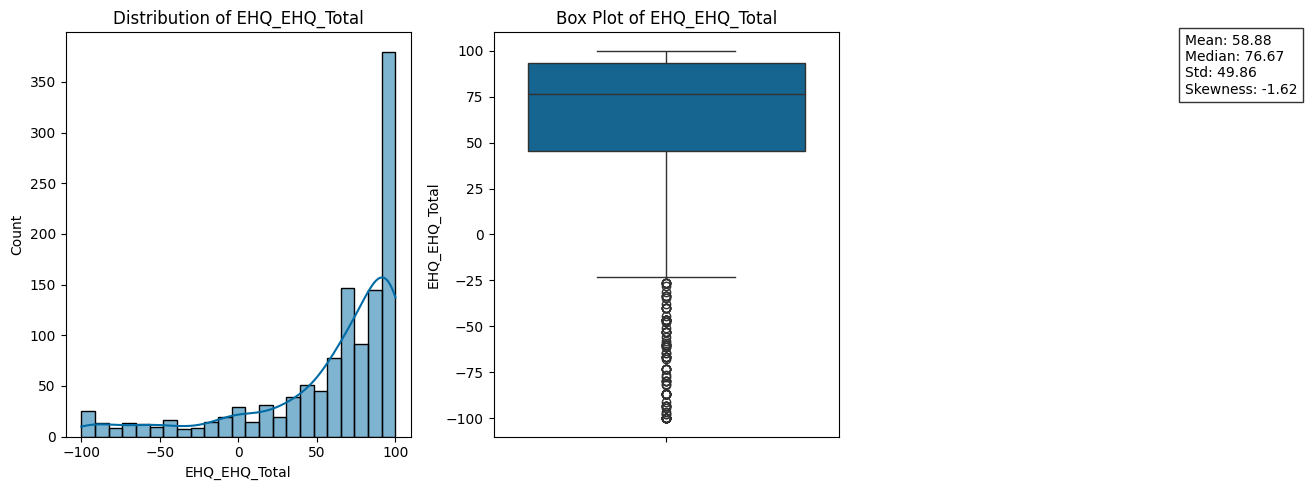

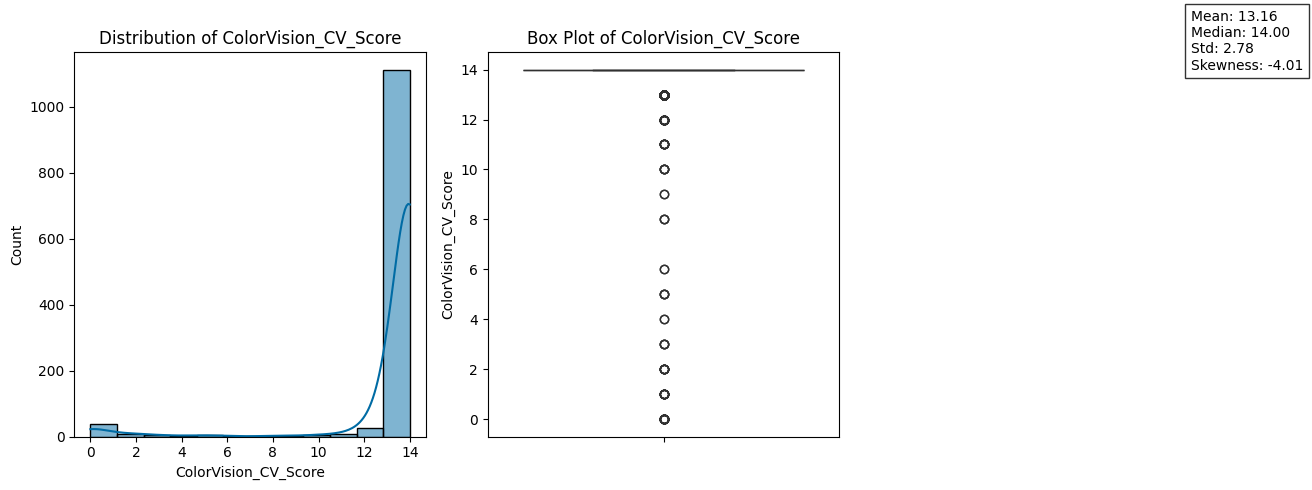

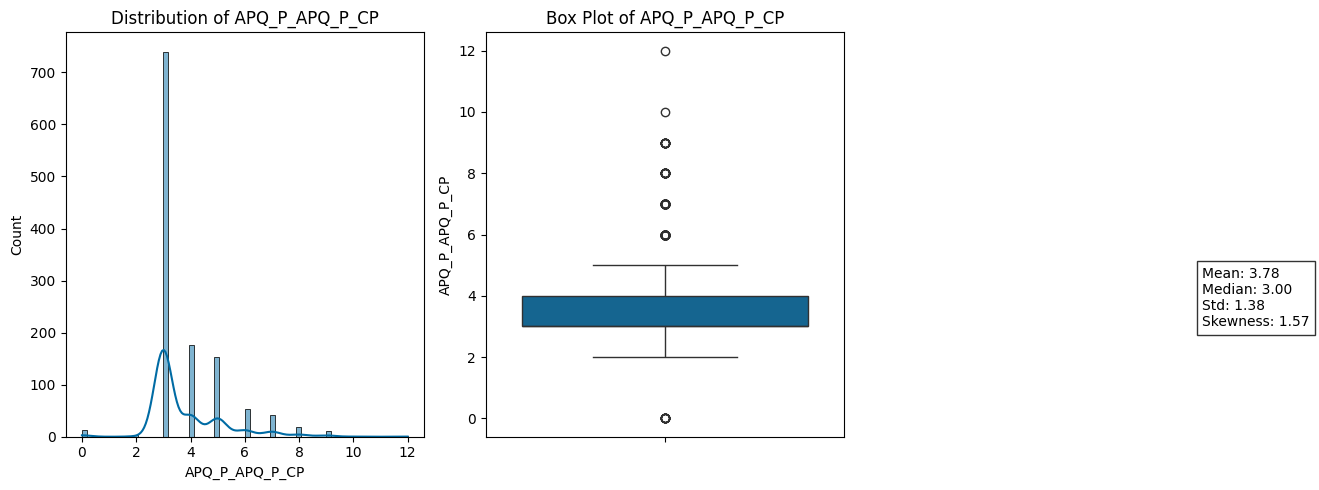

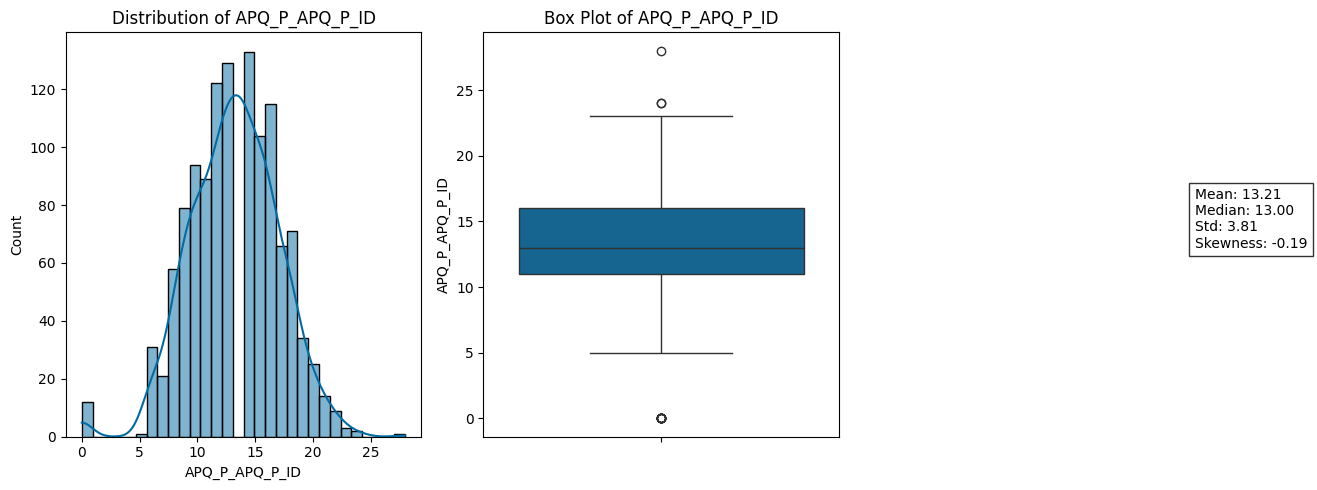

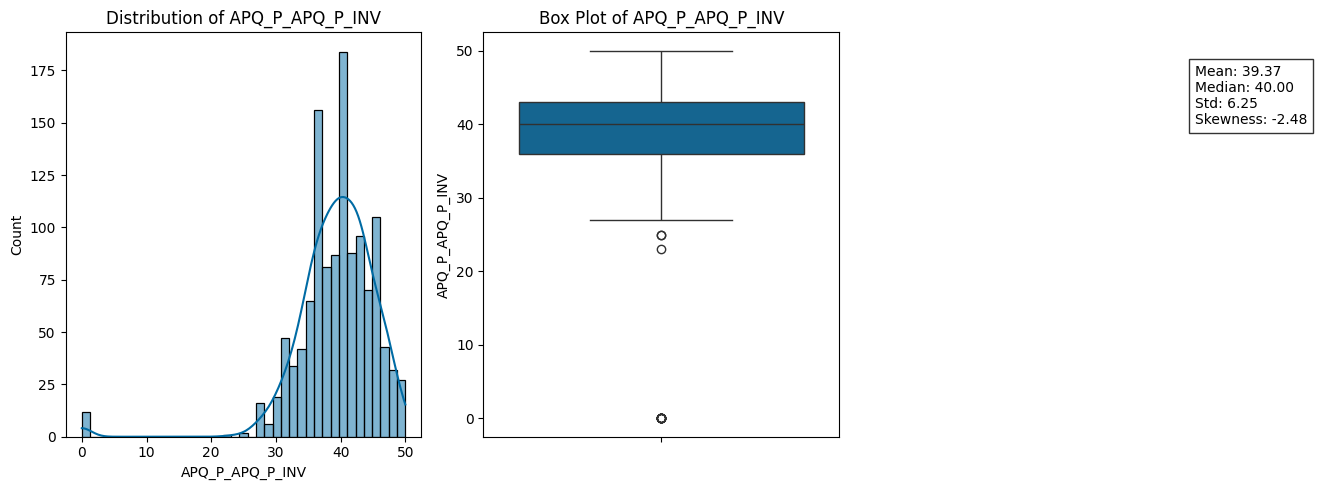

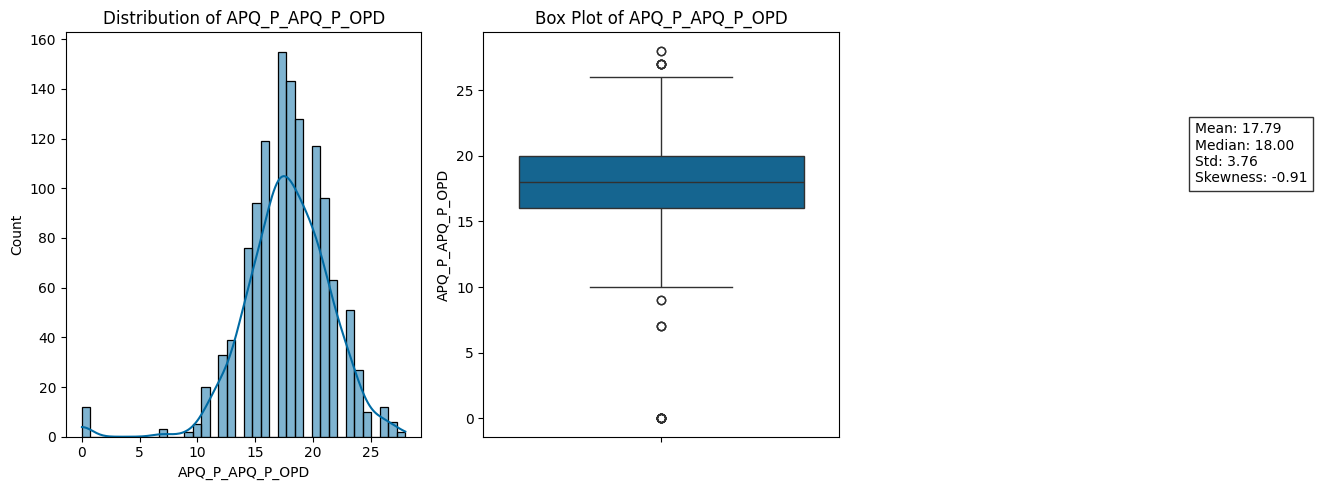

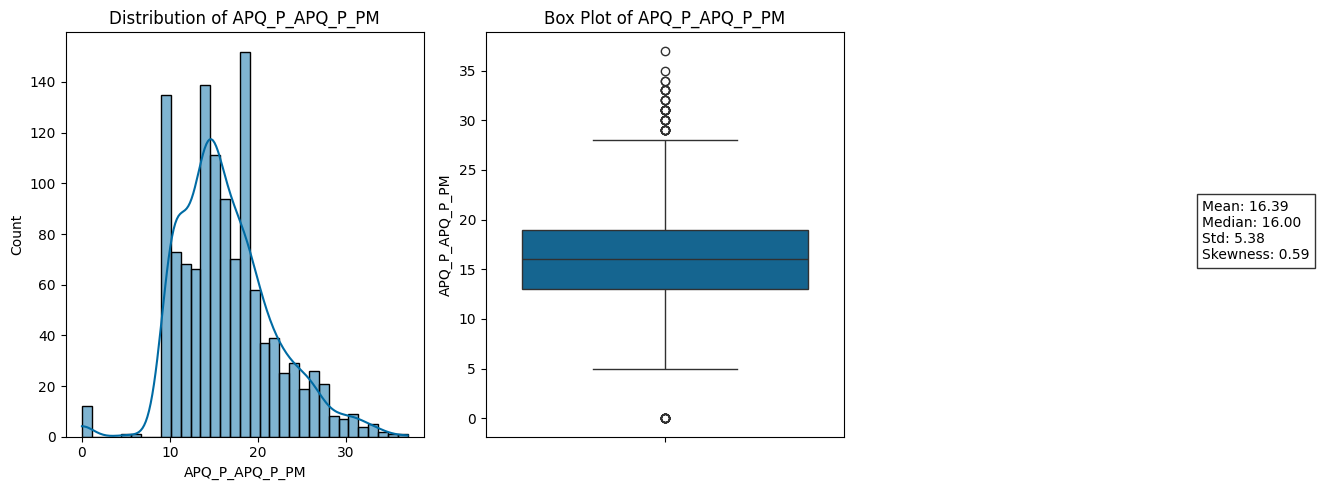

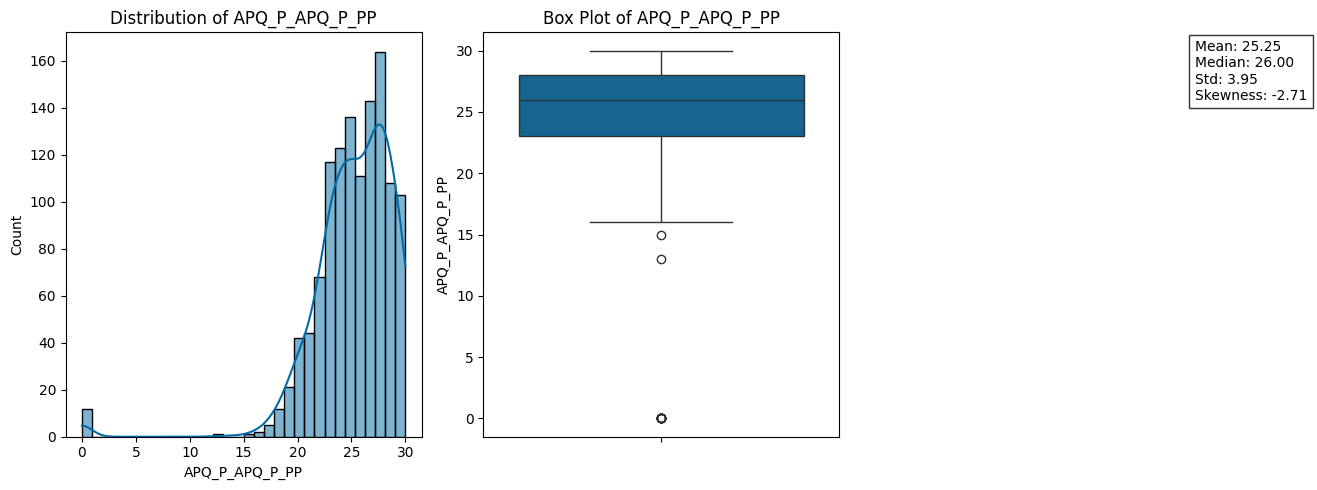

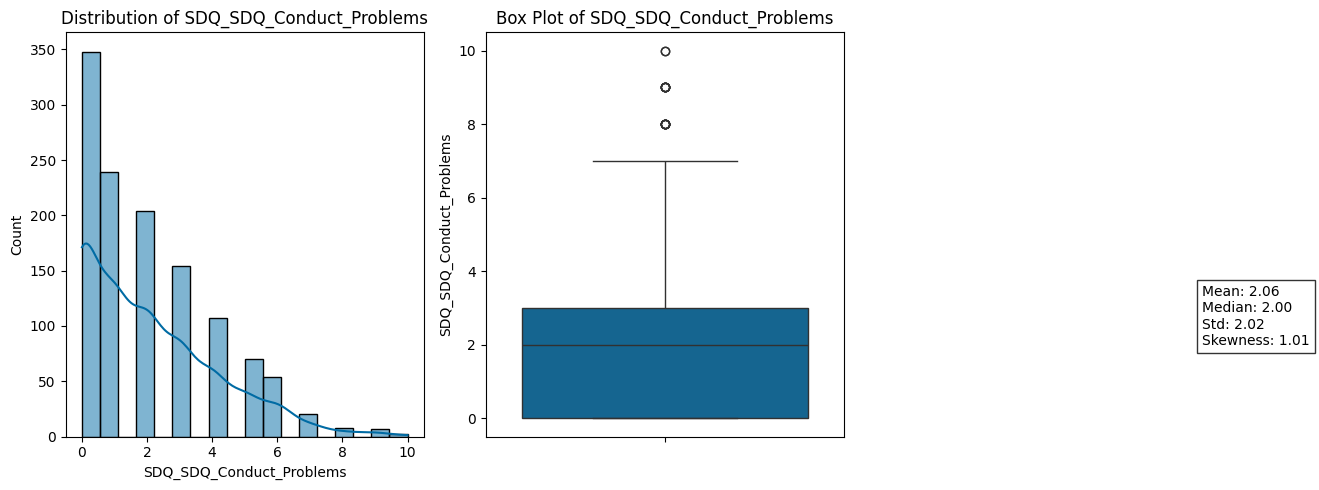

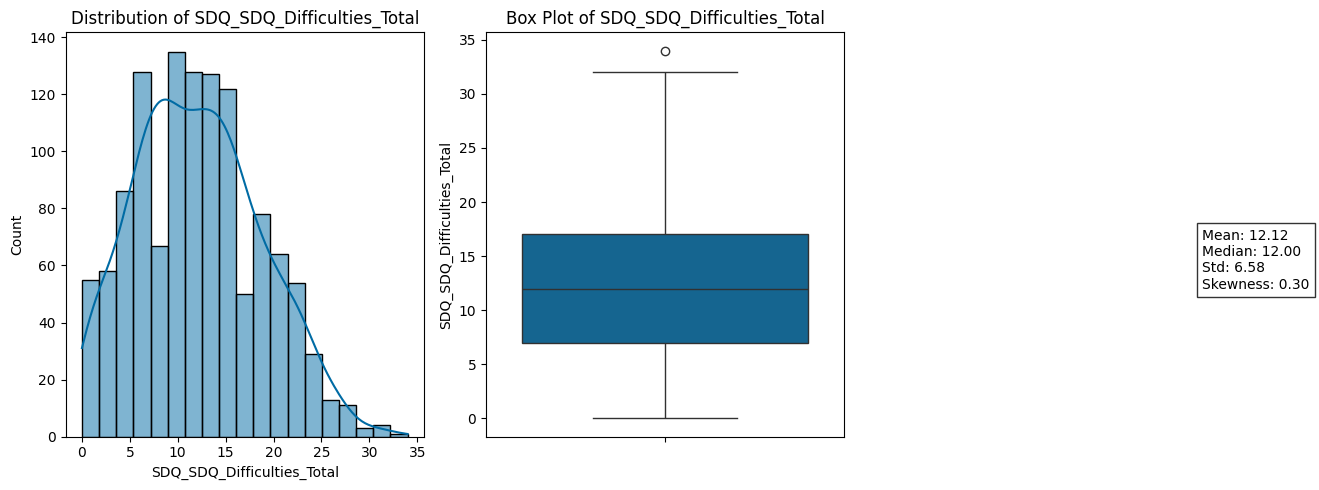

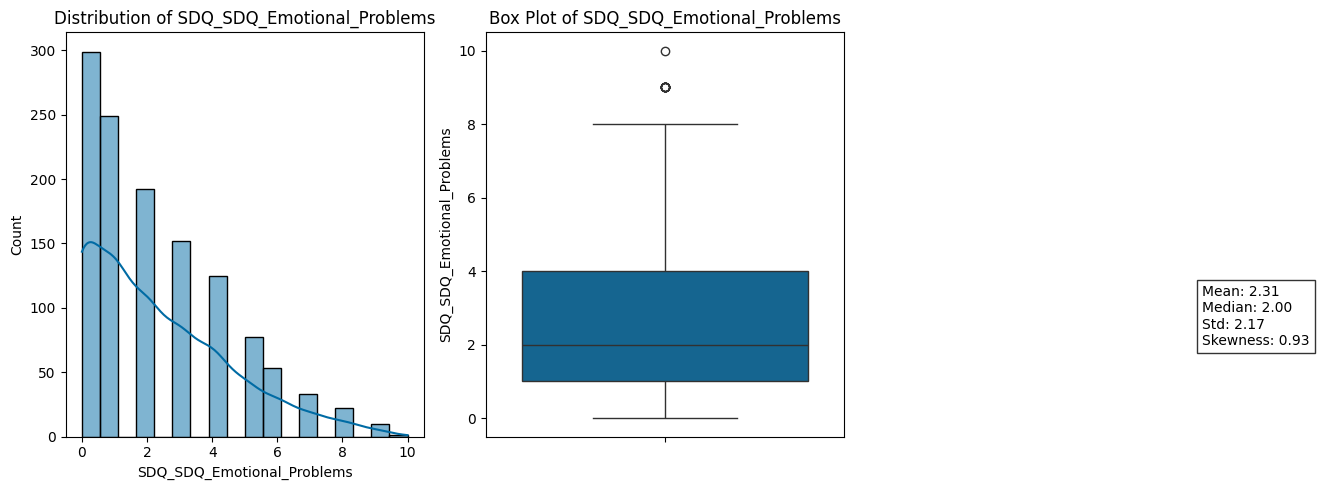

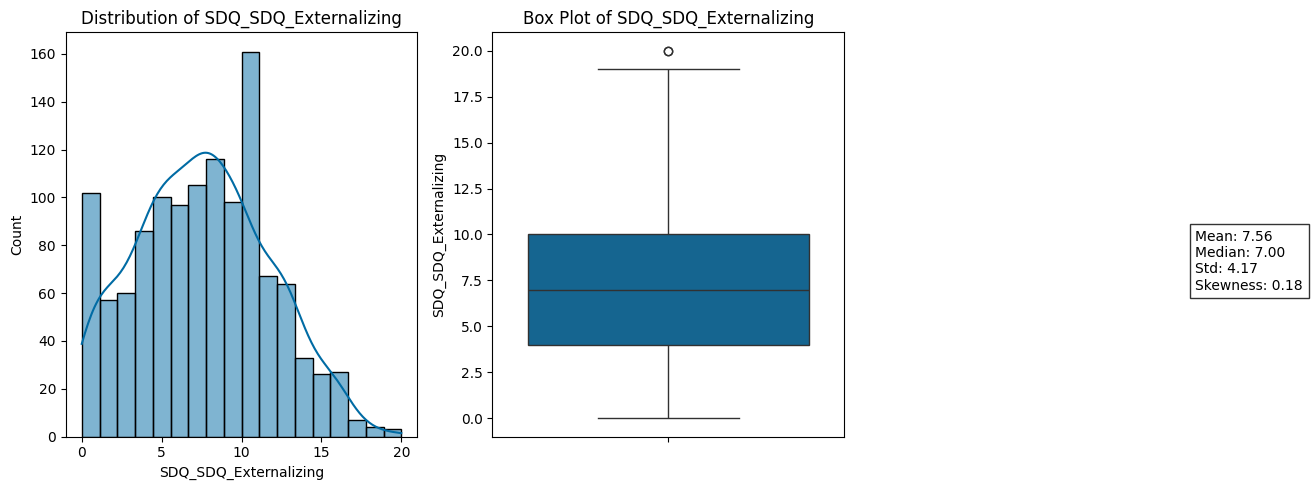

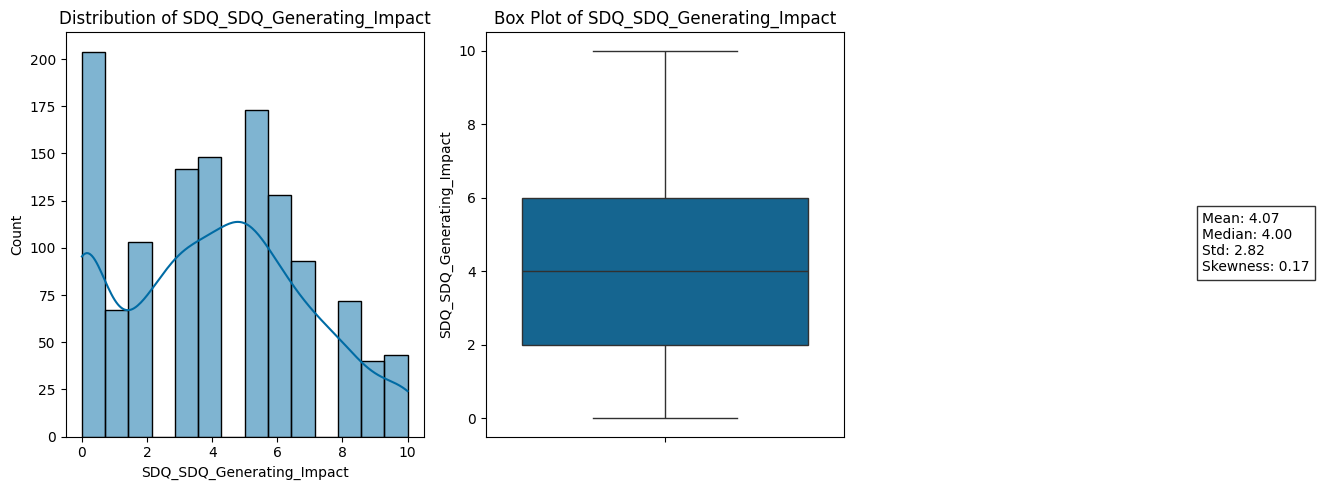

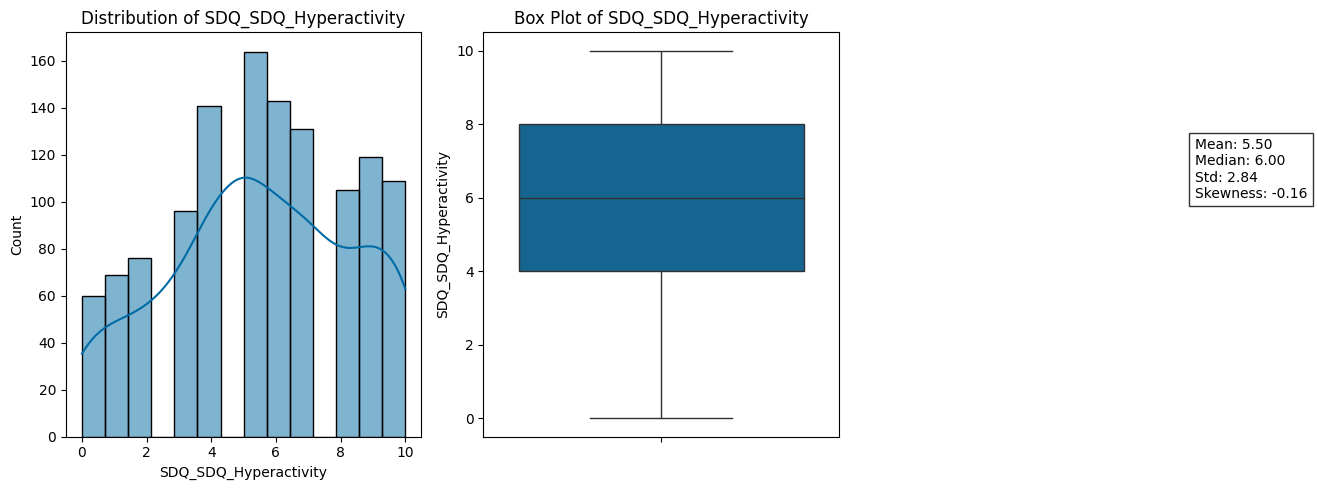

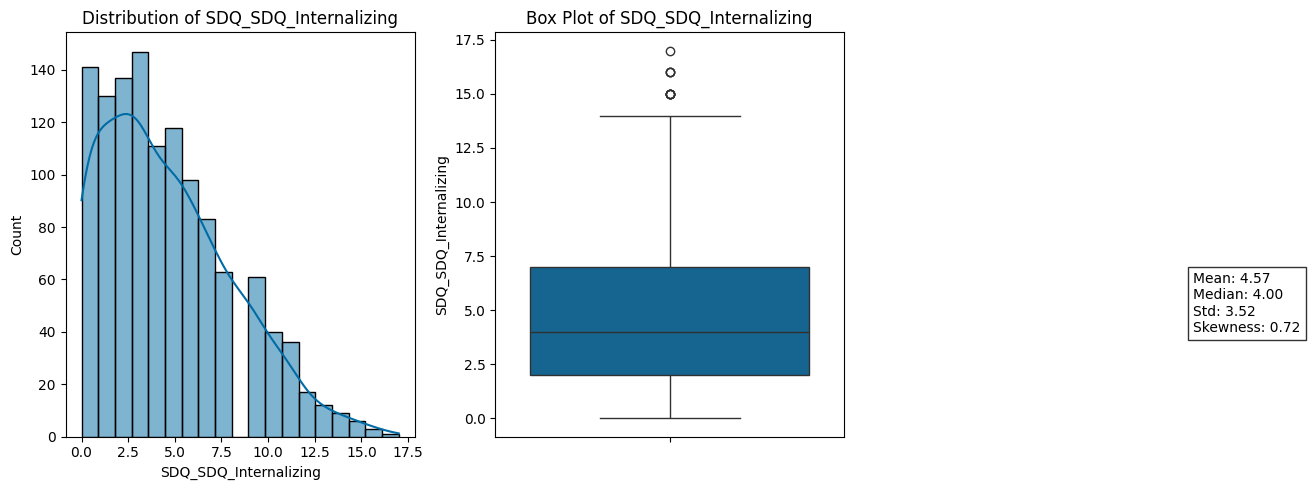

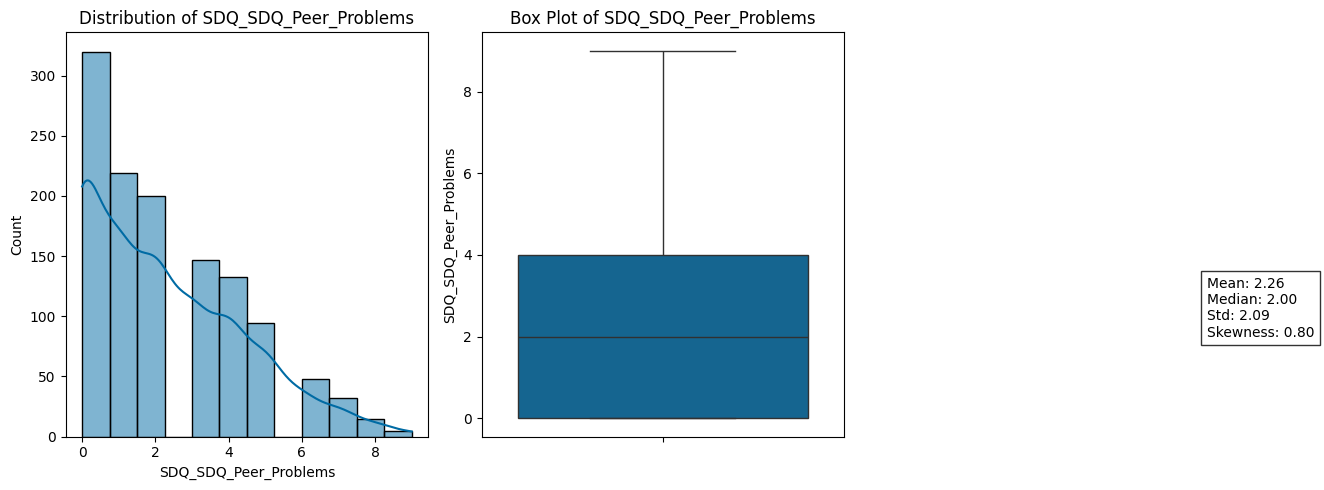

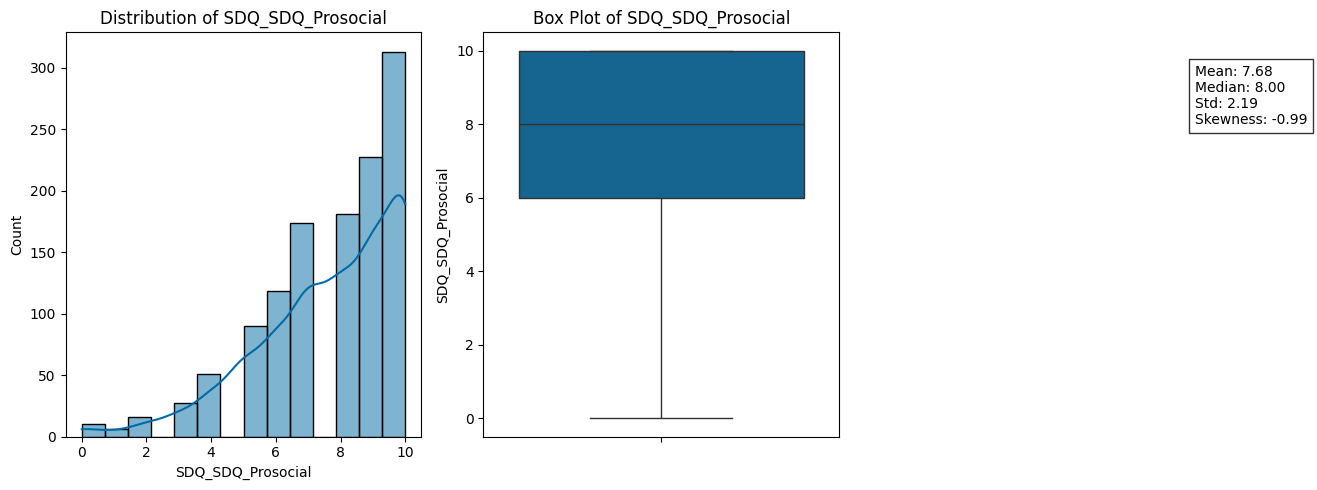

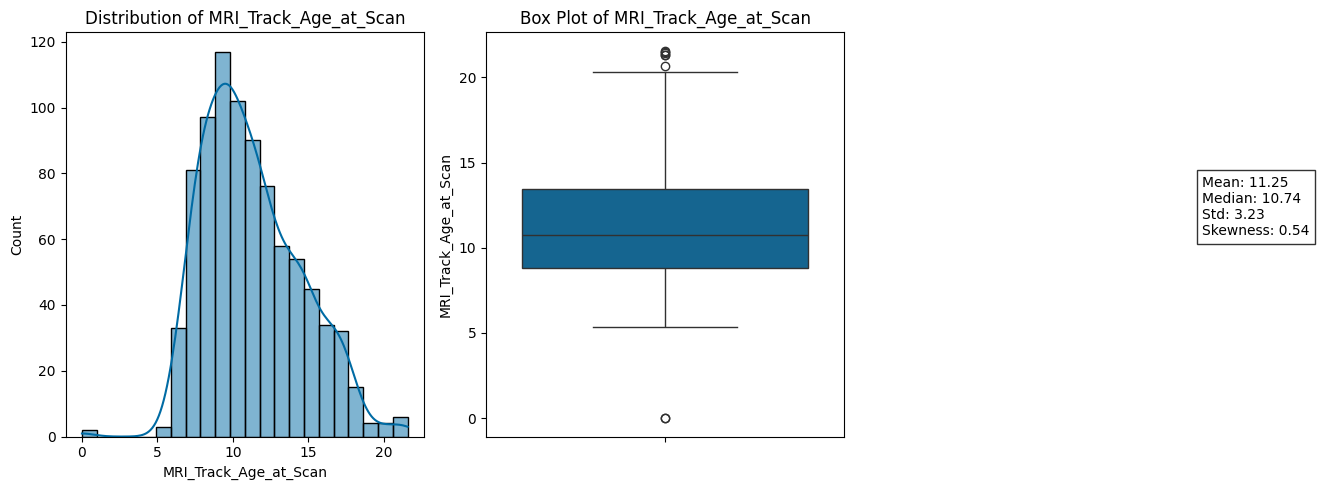

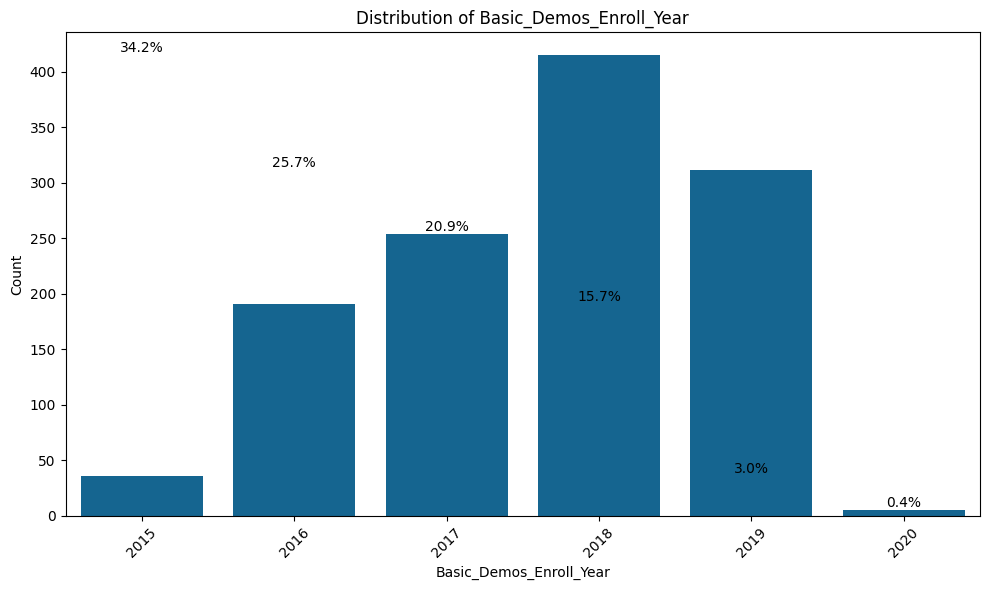

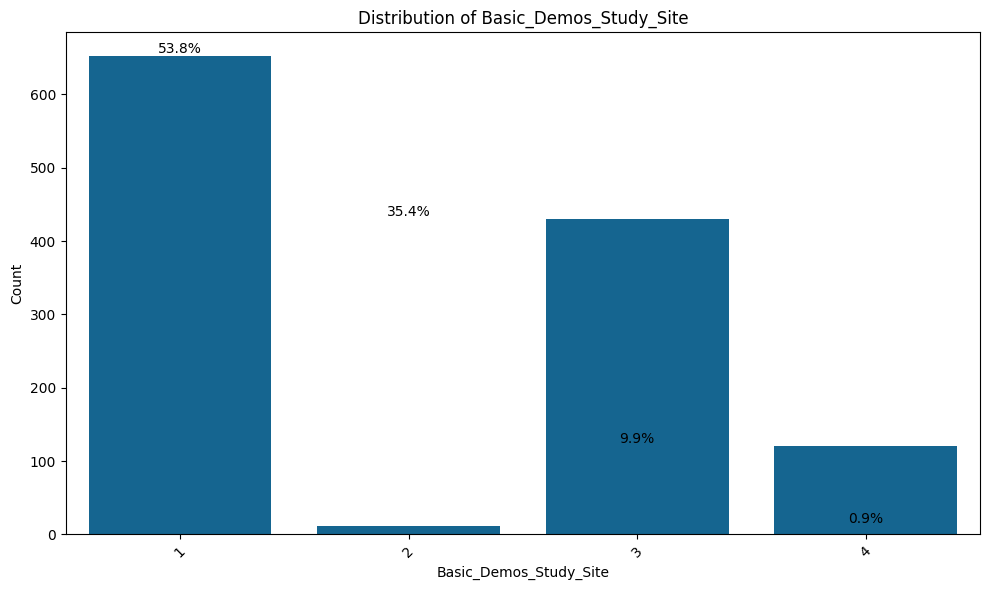

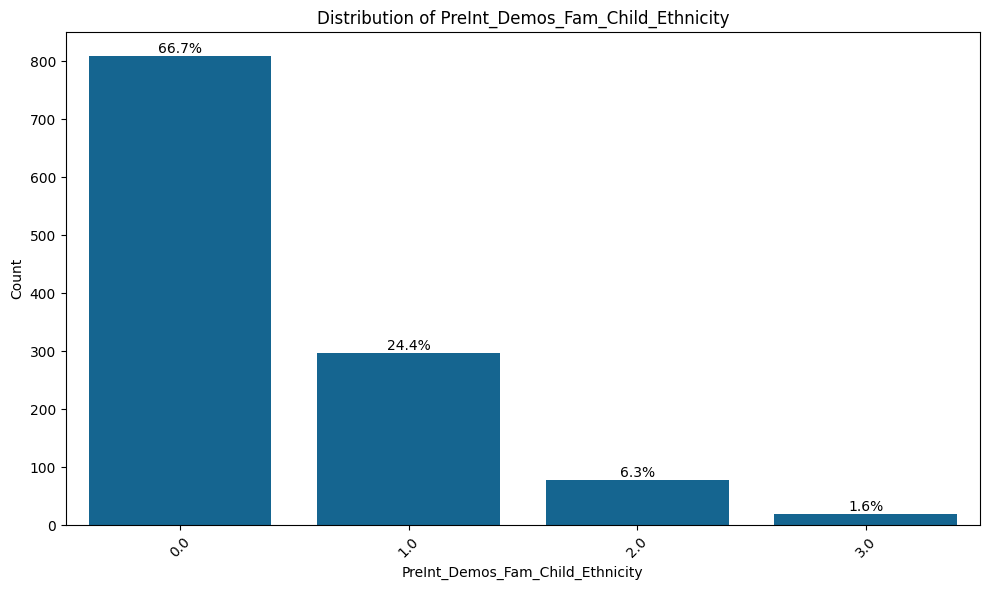

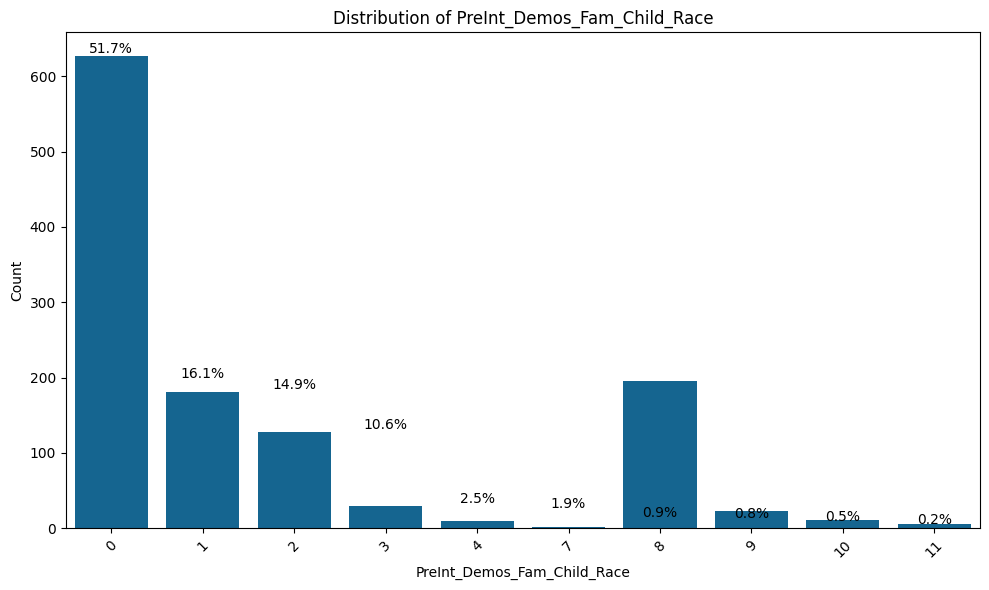

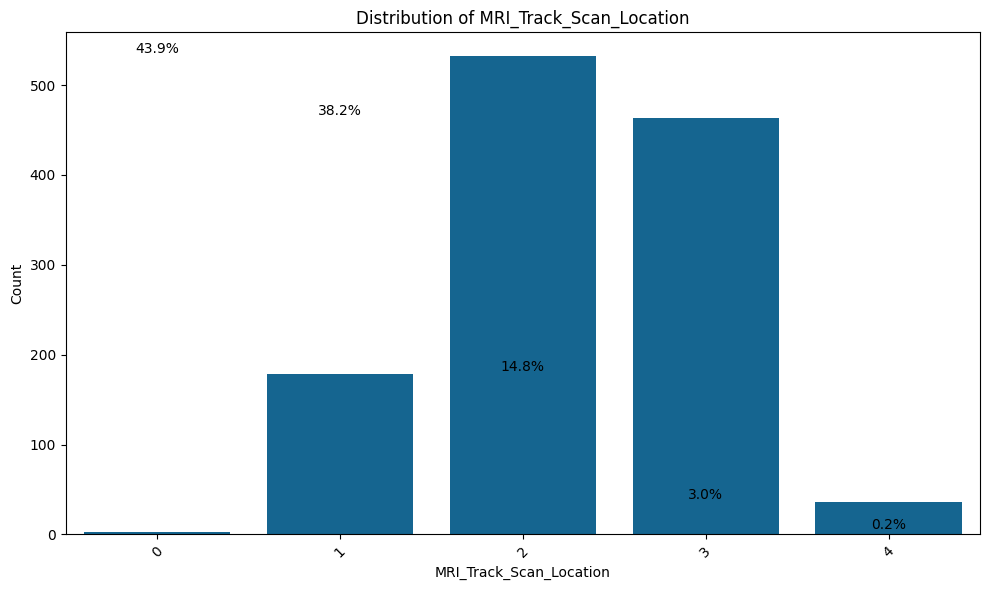

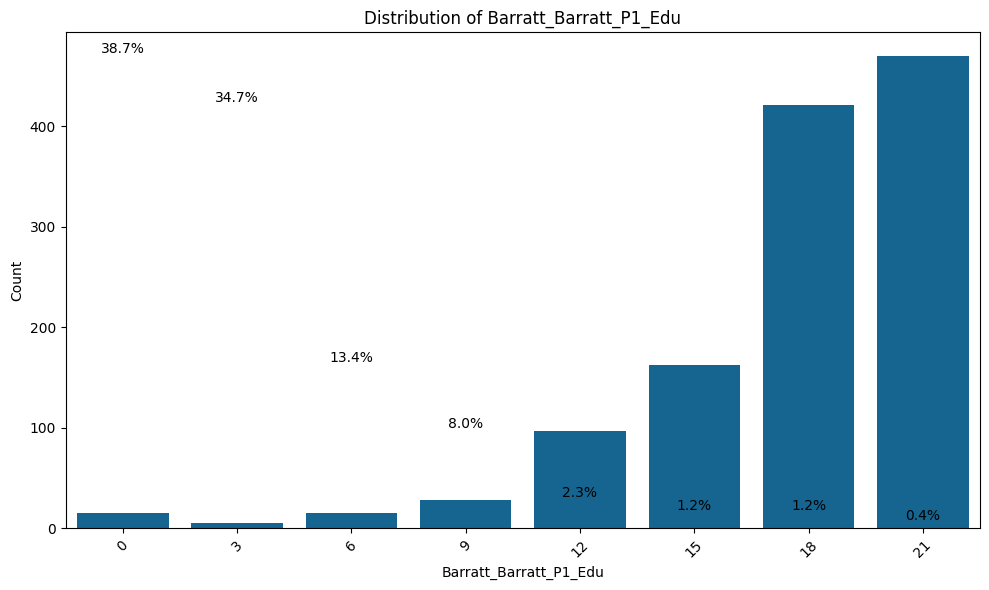

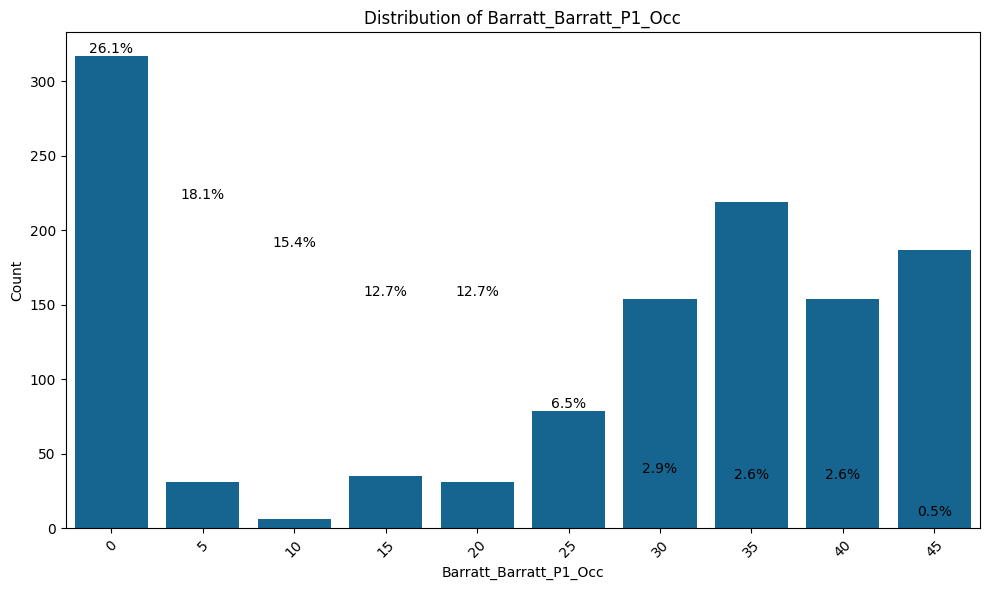

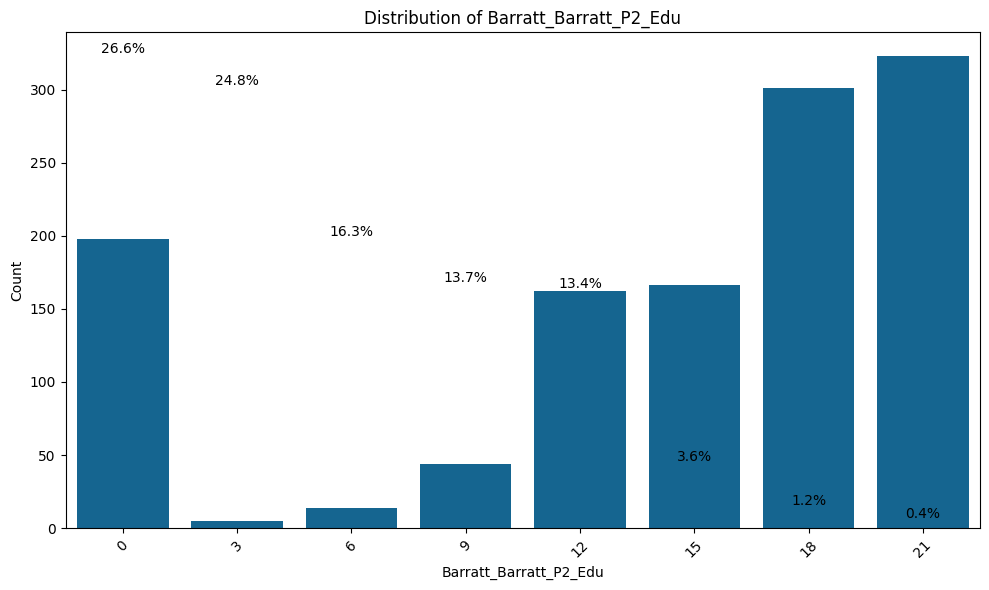

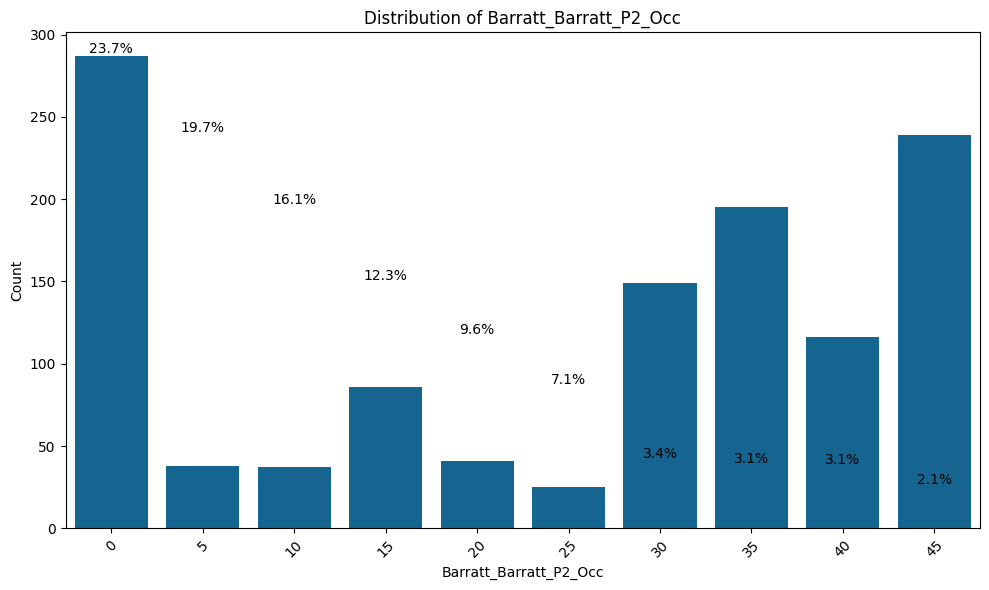

In [ ]:
plot_univariate_analysis(combined_data, continuous_features, categorical_features)

## 4.2 Explore Target Variables
- **What It Involves:**  
  - Examine the distributions of `ADHD` and `Sex_F`.
  - Identify class imbalances in the targets.
- **Why It’s Essential:**  
  - Class imbalance (fewer female ADHD cases) is central to the challenge and must be addressed for model evaluation.
  - Ensures proper stratification during modeling and cross-validation.

---

In [ ]:
#analyze_target_variables analyzes and visualizes the distribution of target variables (ADHD_Outcome, Sex_F).
#Provides insights into target variables and their relationships.
def analyze_target_variables(df):
    """
    Analyze target variables (ADHD_Outcome and Sex_F)
    """
    # Create figure for target variables
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # ADHD Distribution
    adhd_counts = df['ADHD_Outcome'].value_counts()
    sns.barplot(x=adhd_counts.index, y=adhd_counts.values, ax=ax1)
    ax1.set_title('Distribution of ADHD Diagnosis')
    ax1.set_xlabel('ADHD Status')
    ax1.set_ylabel('Count')

    # Add percentage labels
    total = len(df['ADHD_Outcome'])
    for i, v in enumerate(adhd_counts.values):
        ax1.text(i, v, f'{(v/total)*100:.1f}%', ha='center', va='bottom')

    # Sex Distribution
    sex_counts = df['Sex_F'].value_counts()
    sns.barplot(x=sex_counts.index, y=sex_counts.values, ax=ax2)
    ax2.set_title('Distribution of Sex')
    ax2.set_xlabel('Sex (0=Male, 1=Female)')
    ax2.set_ylabel('Count')

    # Add percentage labels
    total = len(df['Sex_F'])
    for i, v in enumerate(sex_counts.values):
        ax2.text(i, v, f'{(v/total)*100:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    # Cross-tabulation of ADHD and Sex
    plt.figure(figsize=(10, 6))
    cross_tab = pd.crosstab(df['Sex_F'], df['ADHD_Outcome'], normalize='index') * 100
    cross_tab.plot(kind='bar', stacked=True)
    plt.title('ADHD Diagnosis Distribution by Sex')
    plt.xlabel('Sex (0=Male, 1=Female)')
    plt.ylabel('Percentage')
    plt.legend(title='ADHD Status')

    # Add percentage labels
    for i in range(len(cross_tab)):
        cumsum = 0
        for j in range(len(cross_tab.columns)):
            plt.text(i, cumsum + cross_tab.iloc[i,j]/2,
                    f'{cross_tab.iloc[i,j]:.1f}%',
                    ha='center')
            cumsum += cross_tab.iloc[i,j]

    plt.tight_layout()
    plt.show()



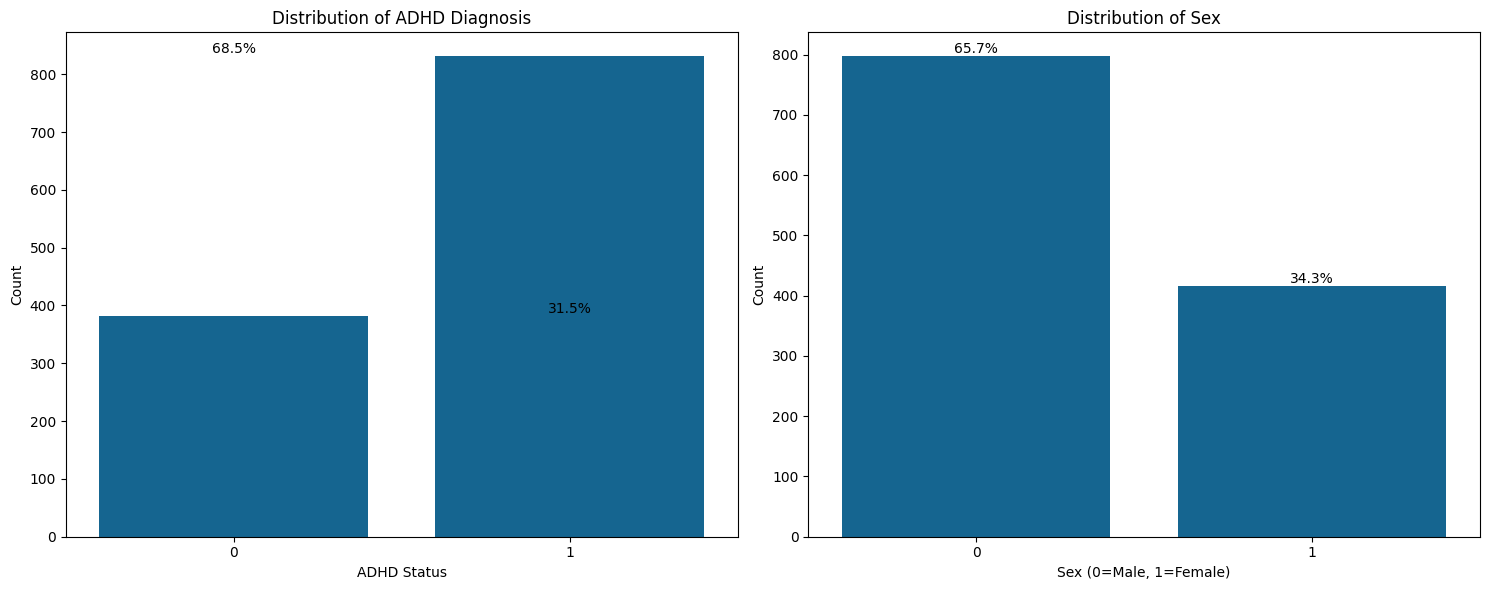

<Figure size 1000x600 with 0 Axes>

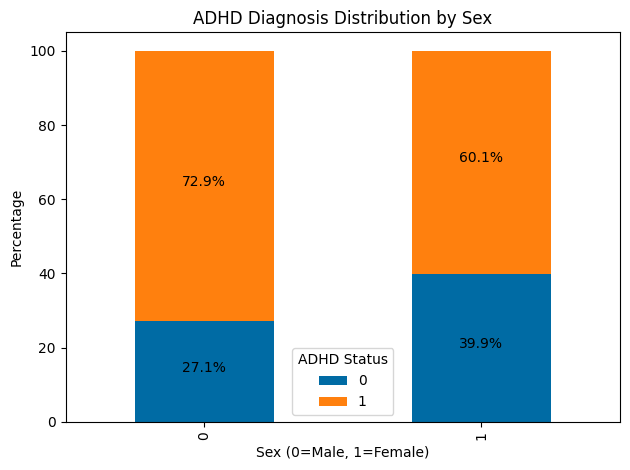

In [ ]:
analyze_target_variables(combined_data)

## 4.3 Bivariate Analysis
- **What It Involves:**  
  - Explore correlations between features and the target variables using box plots and statistical tests.
  - Evaluate relationships between connectome patterns and socio-demographic factors.
- **Why It’s Essential:**  
  - Reveals key predictors for ADHD and sex classification, aiding feature selection.
  - Helps uncover potential gender inequities in brain activity patterns associated with ADHD.

---

Bivariate Analysis explores the relationship between two variables

In [ ]:
#To assess relationships between continuous features and target variables,
#identifying significant predictors for modeling.
def bivariate_analysis(df, continuous_features, target_vars):
    """
    Perform bivariate analysis between features and target variables
    """
    # Analysis for each target variable
    for target in target_vars:
        # Boxplots for continuous features by target
        for feature in continuous_features:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=target, y=feature, data=df)
            plt.title(f'{feature} Distribution by {target}')
            plt.xlabel(target)
            plt.ylabel(feature)

            # Add statistical test results
            test_stat, p_value = stats.ttest_ind(
                df[df[target] == 0][feature],
                df[df[target] == 1][feature]
            )
            plt.text(0.5, df[feature].max(),
                    f't-stat: {test_stat:.2f}\np-value: {p_value:.4f}',
                    ha='center', va='top',
                    bbox=dict(facecolor='white', alpha=0.8))

            plt.tight_layout()
            plt.show()

**T-Statistic (t-stat):** Tells us how different two groups are. A higher t-stat means the groups are more different. A t-stat above +2 or below -2 is often considered high, indicating a strong difference between the groups.

**P-Value:**

Low p-value (< 0.05): Suggests a significant difference between groups.

High p-value (> 0.05): Suggests no significant difference.

Both help determine if a feature is statistically associated with the target variable.

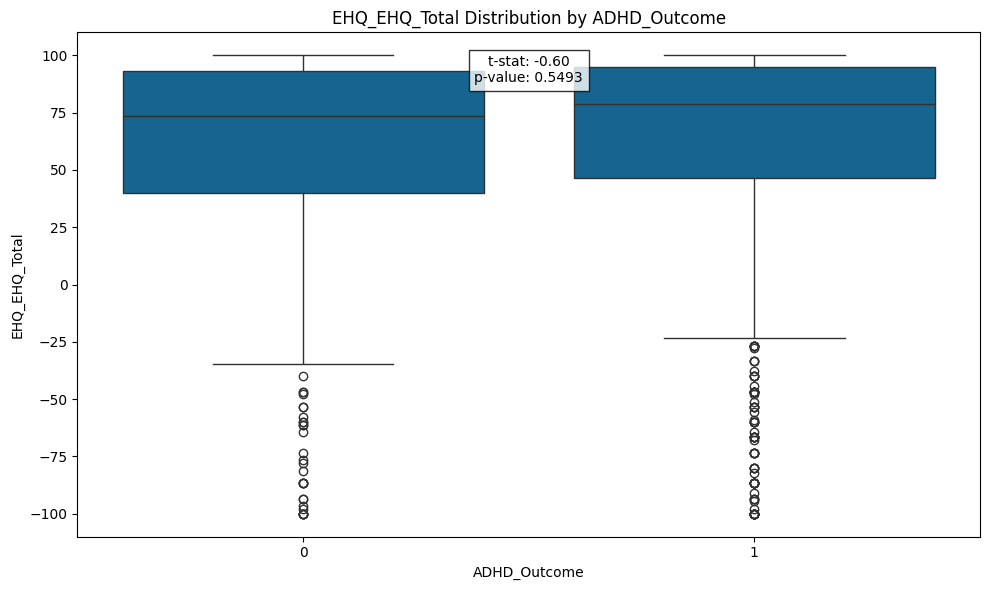

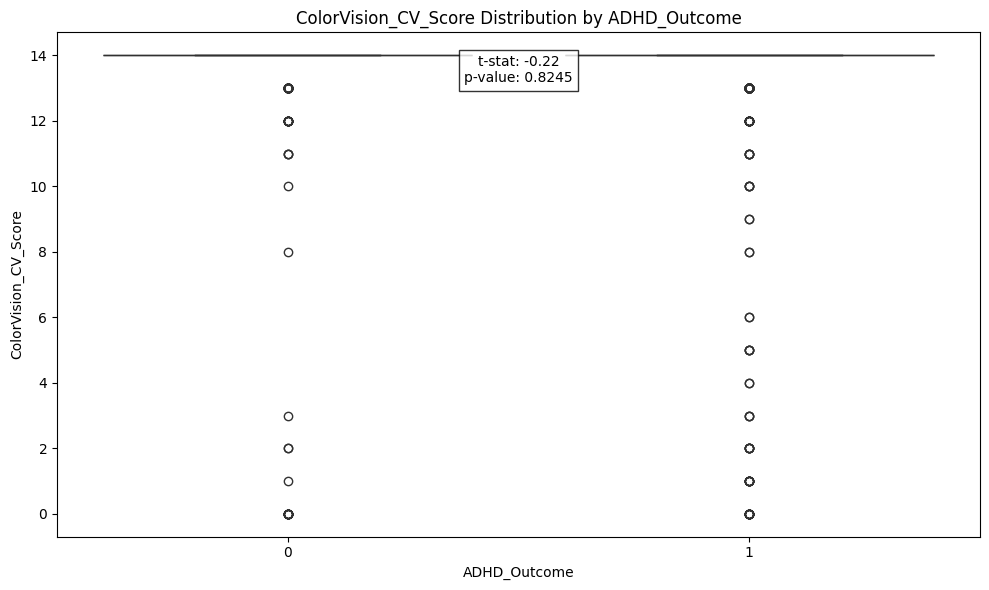

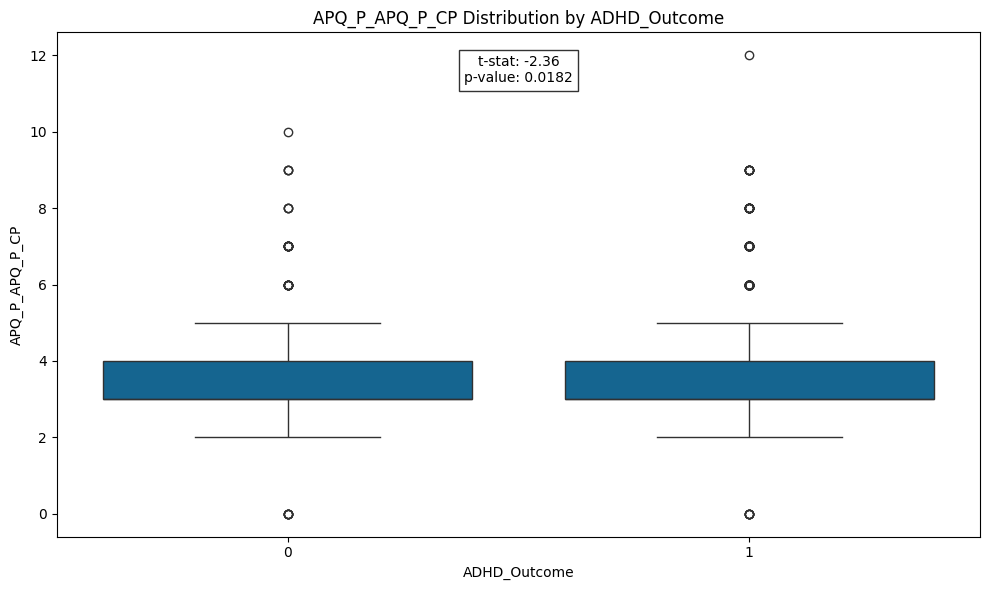

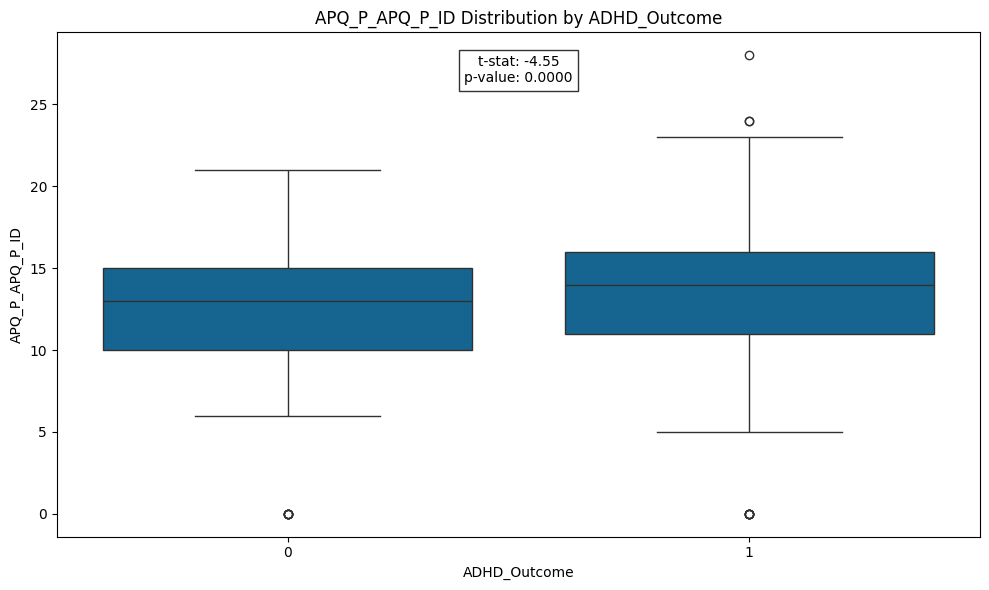

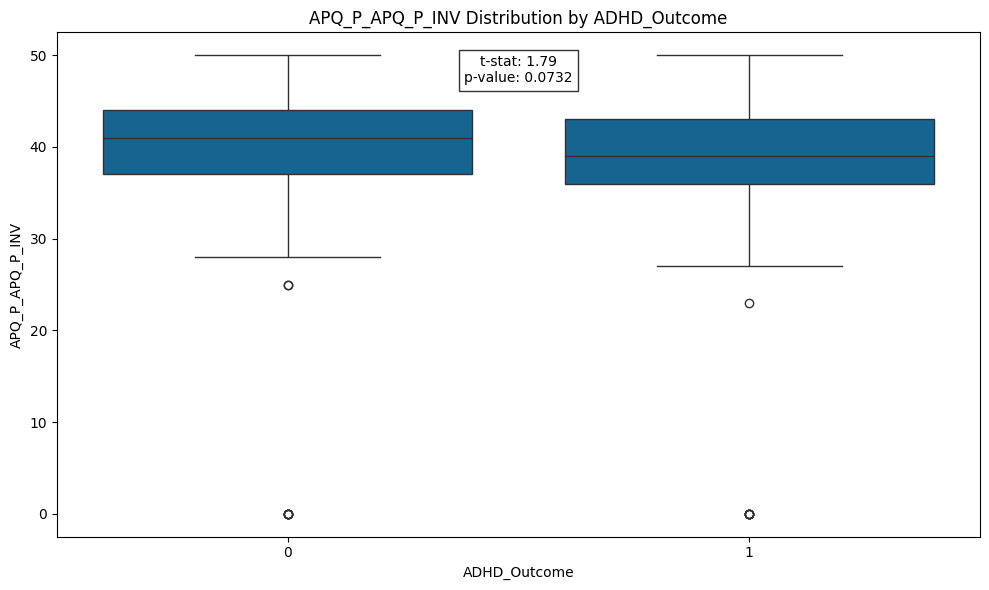

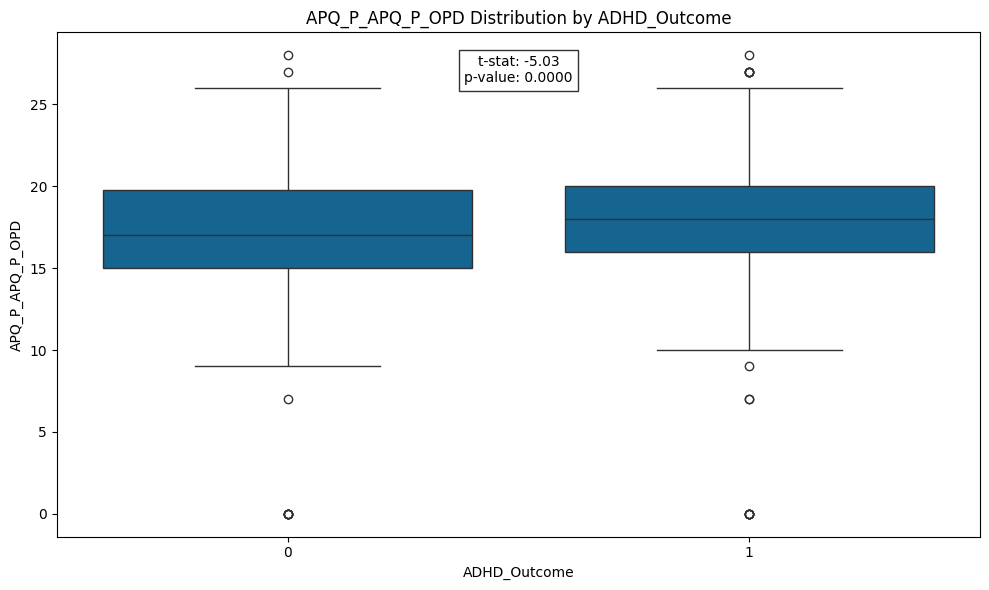

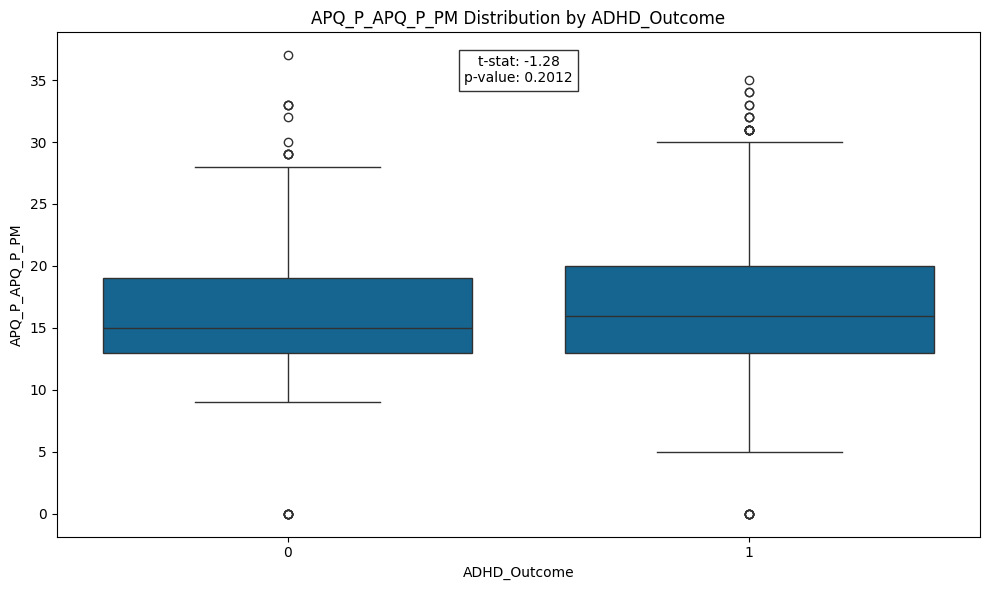

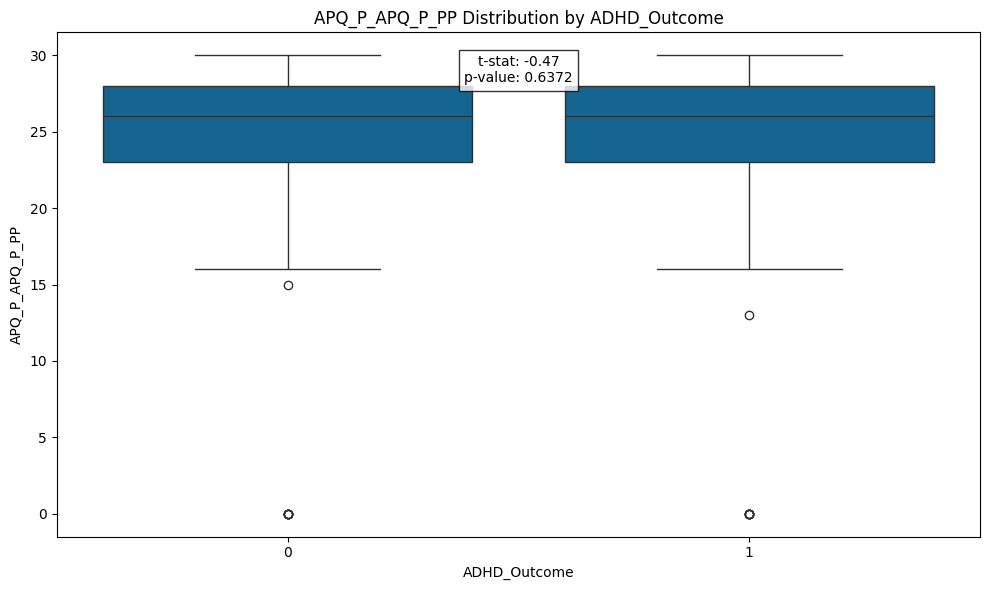

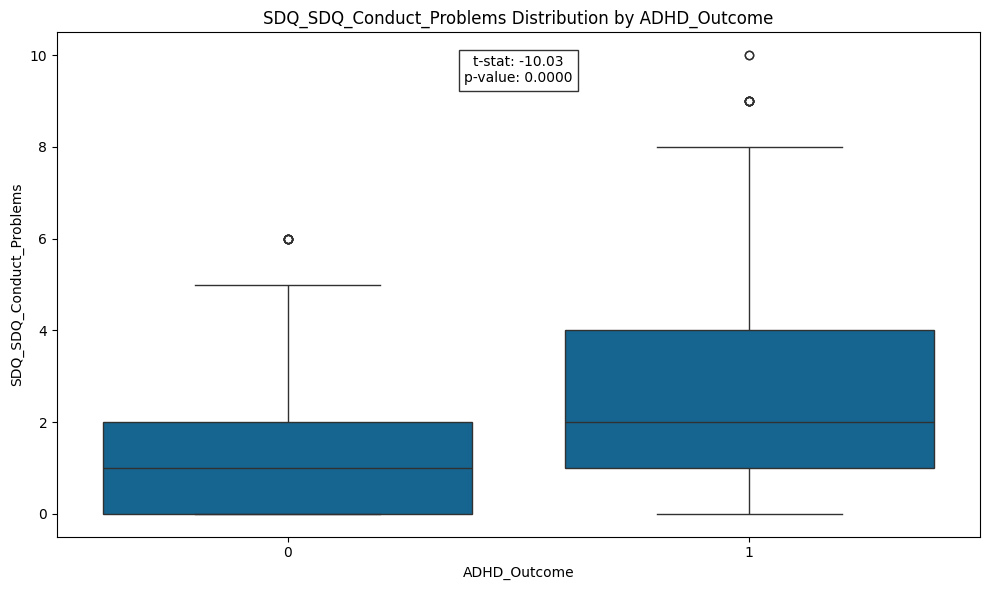

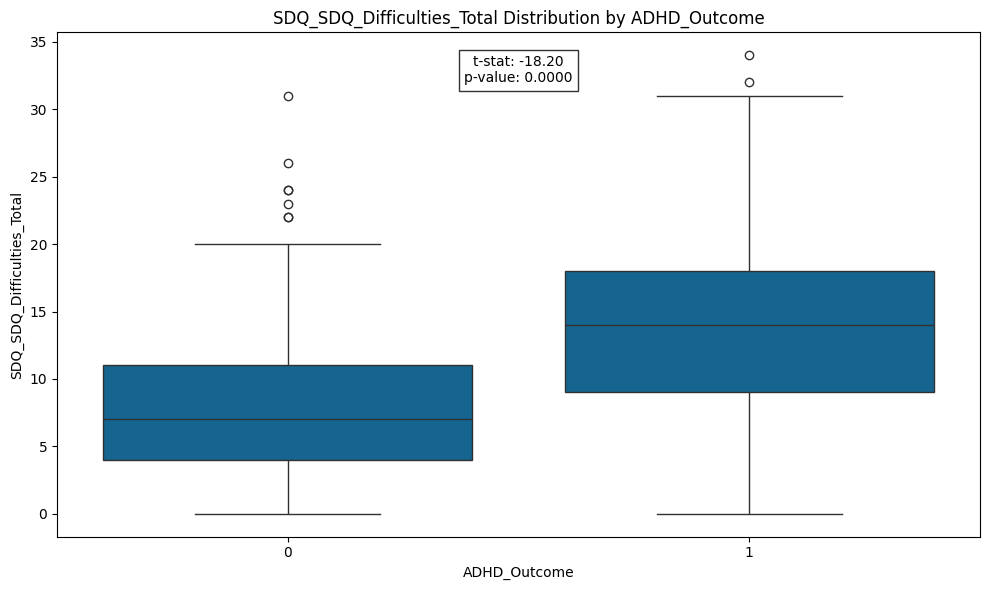

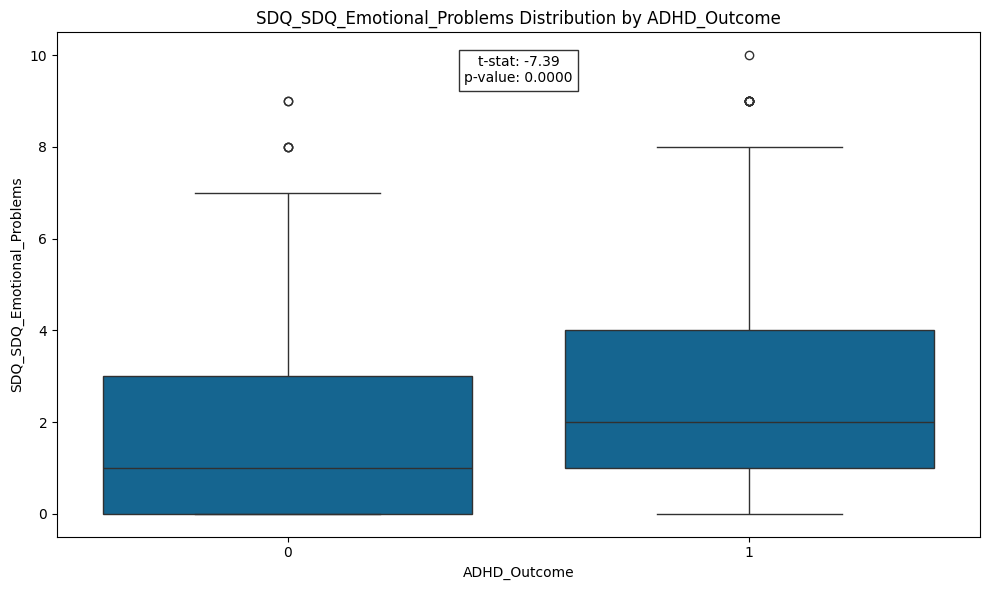

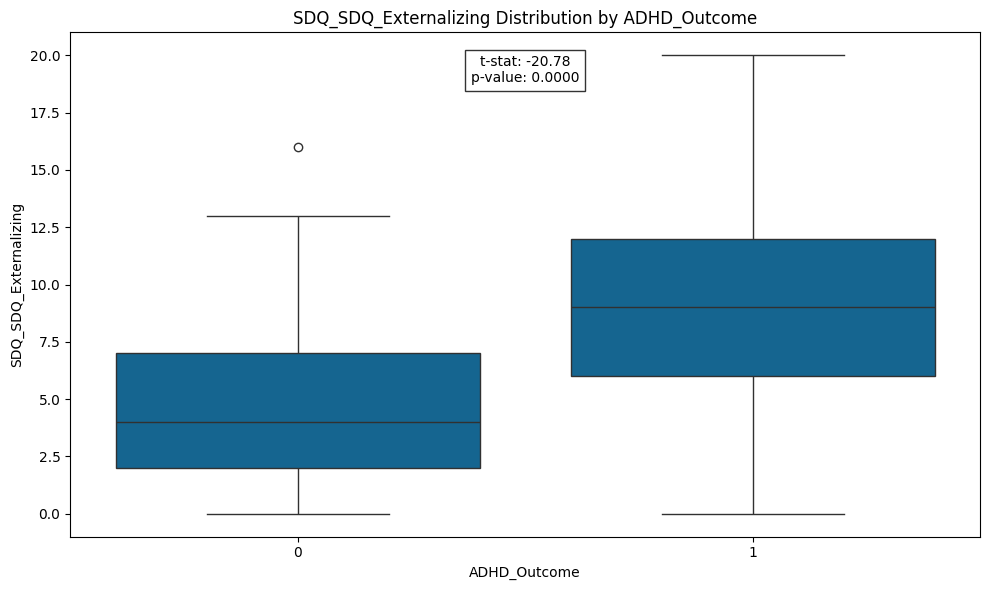

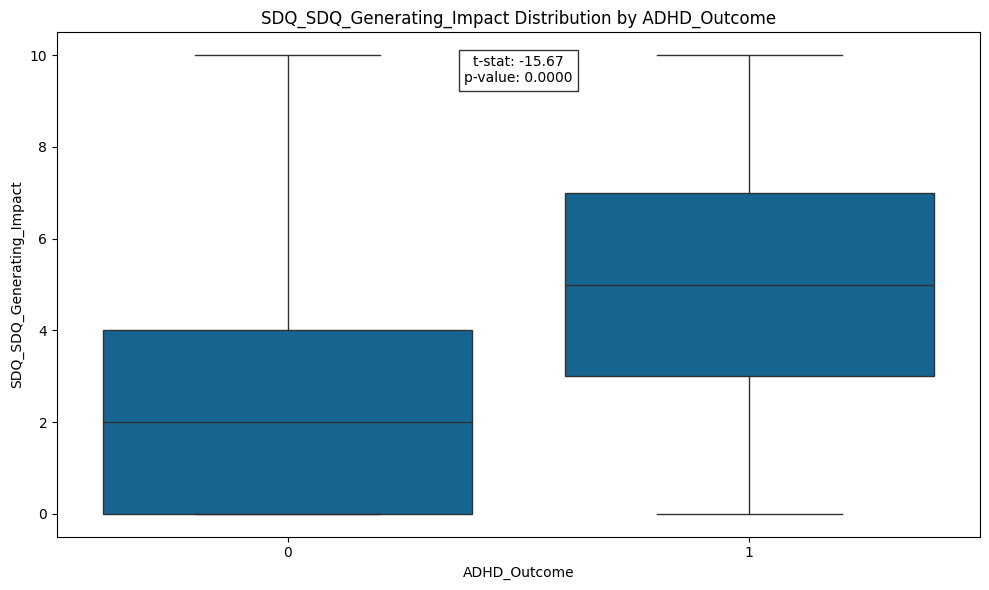

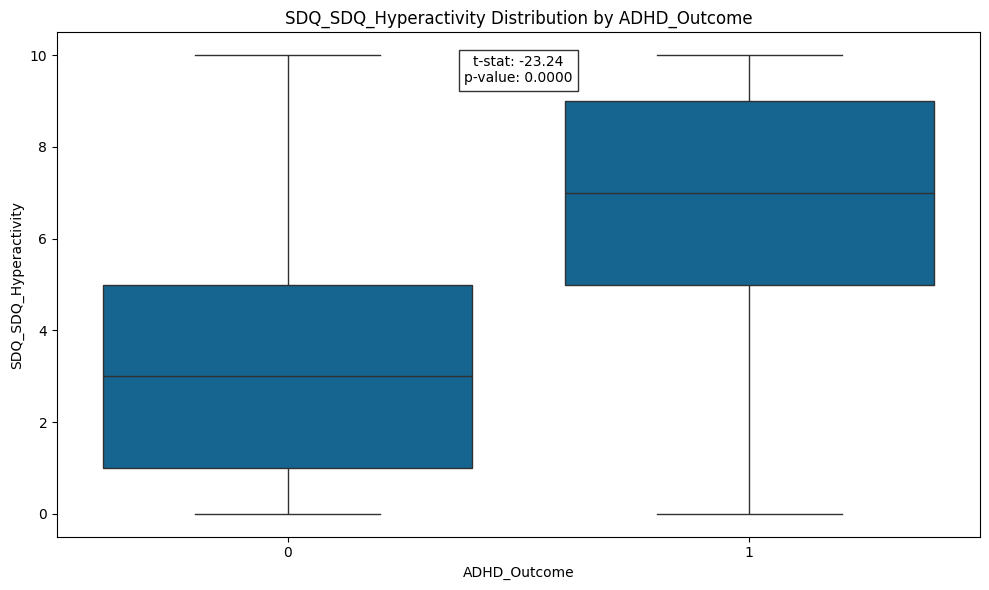

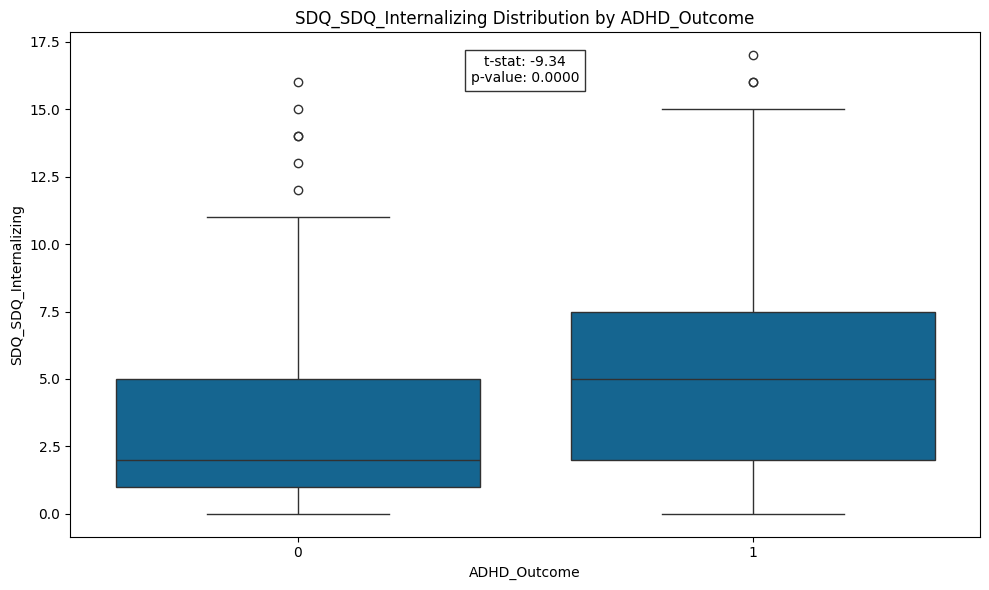

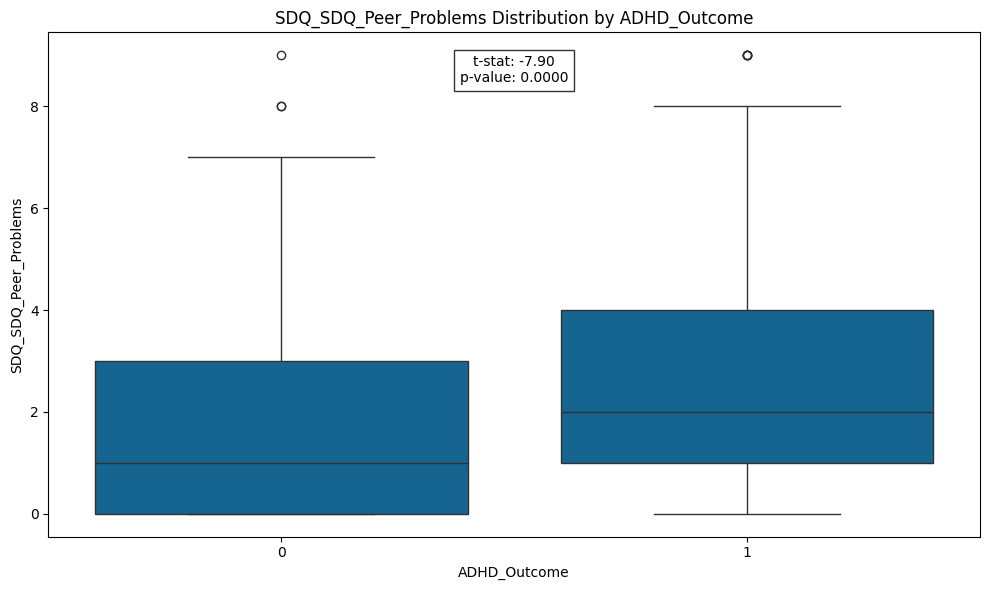

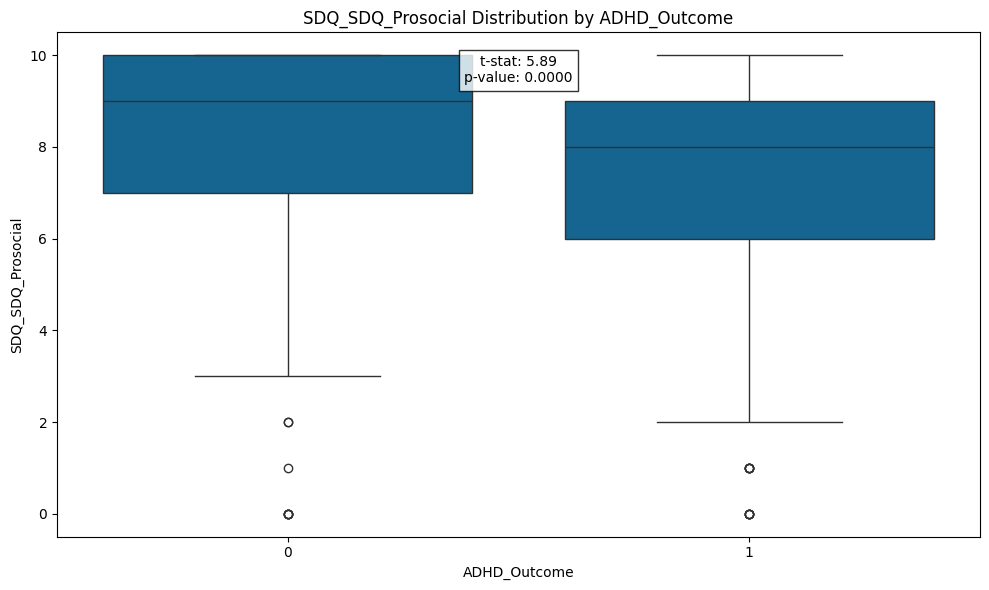

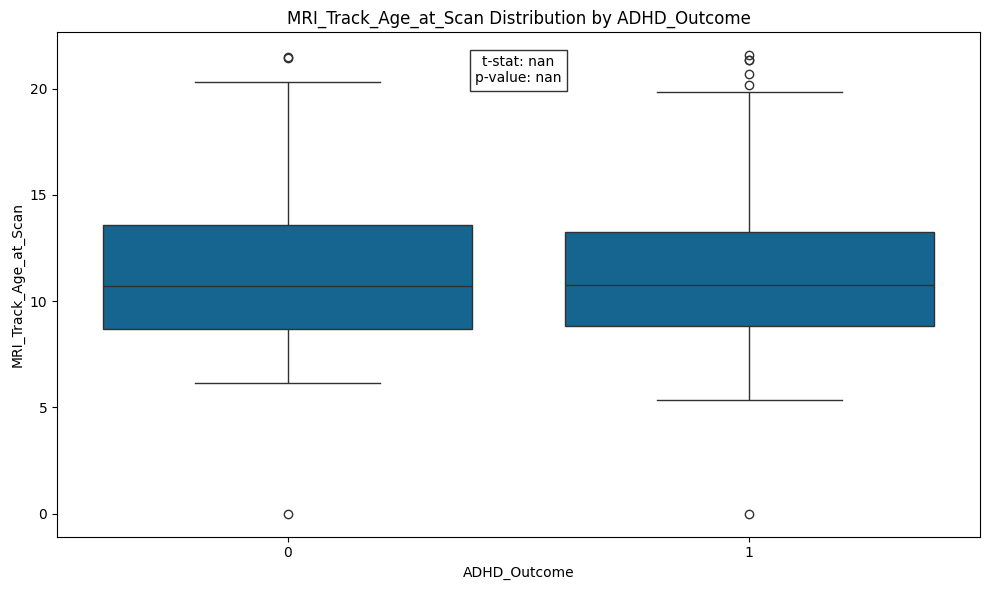

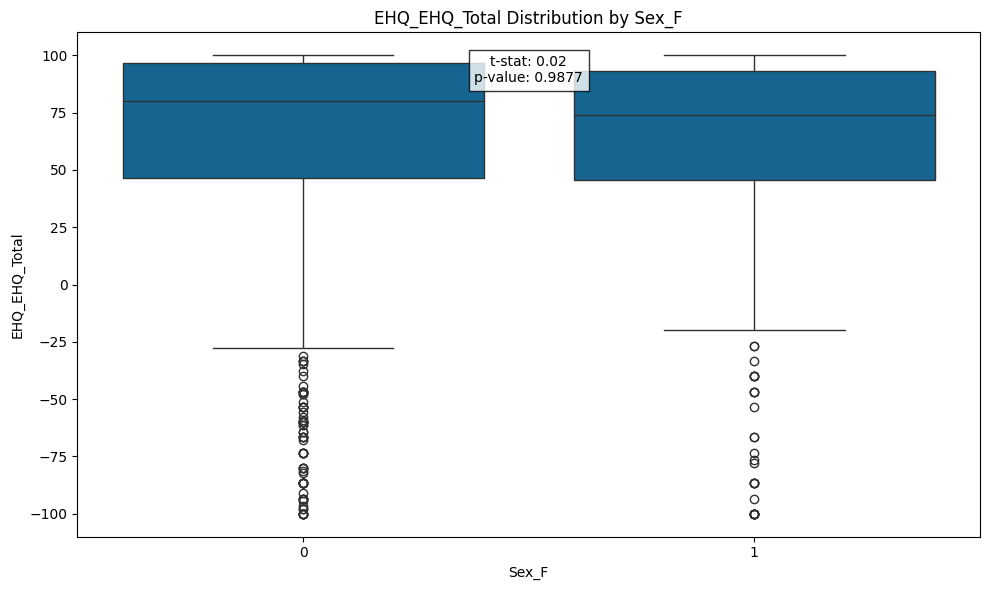

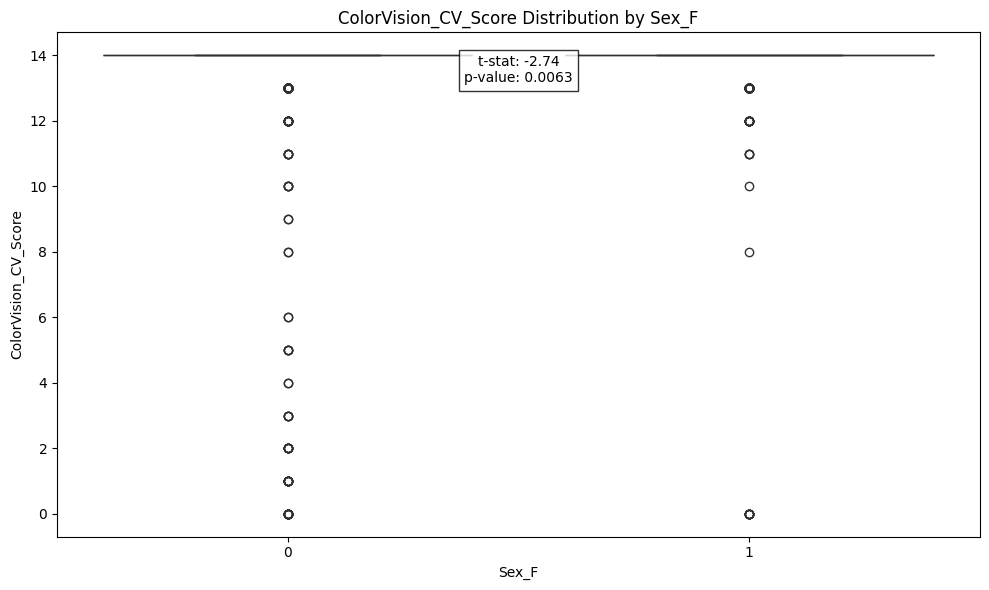

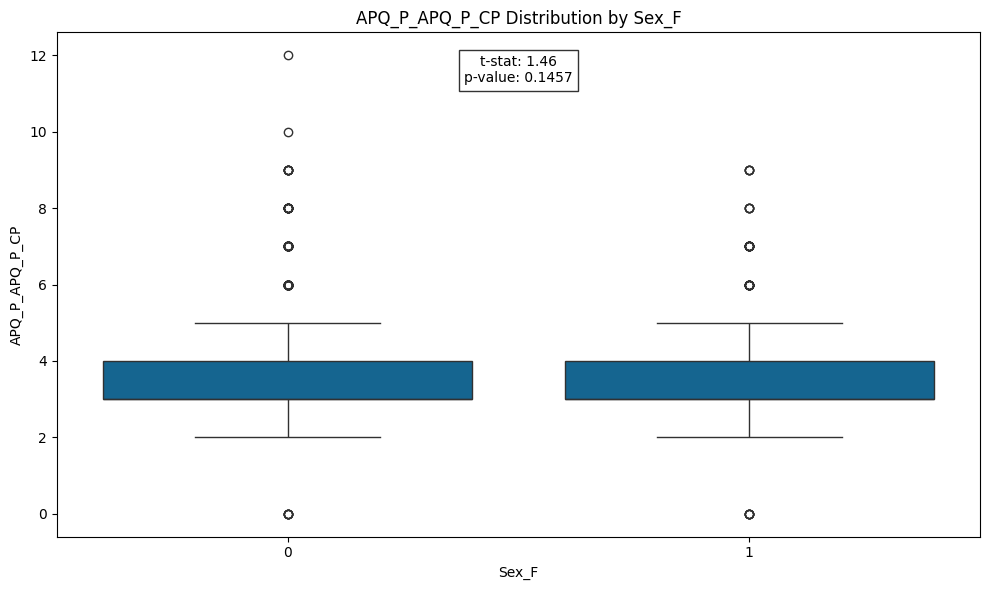

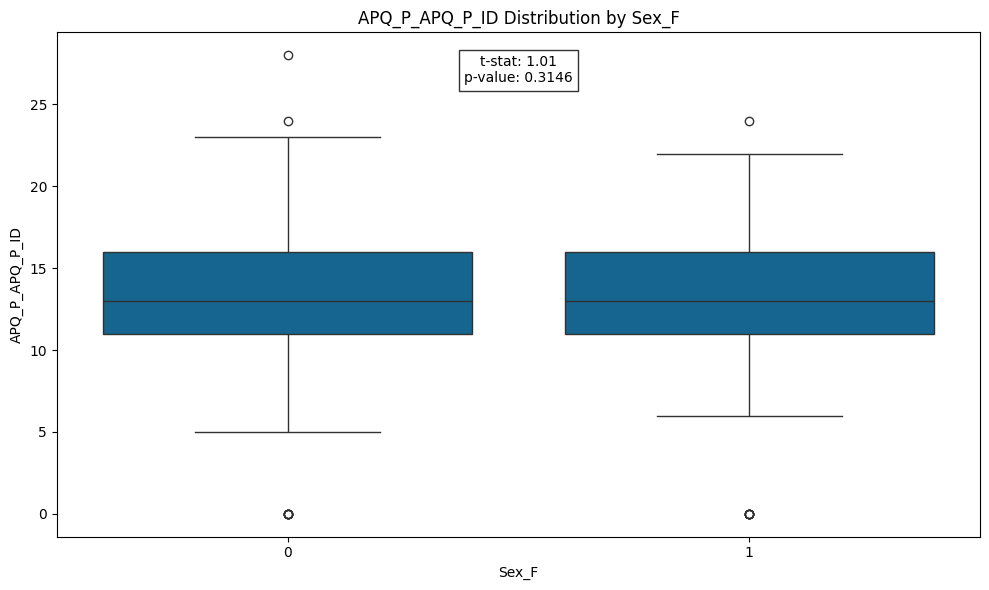

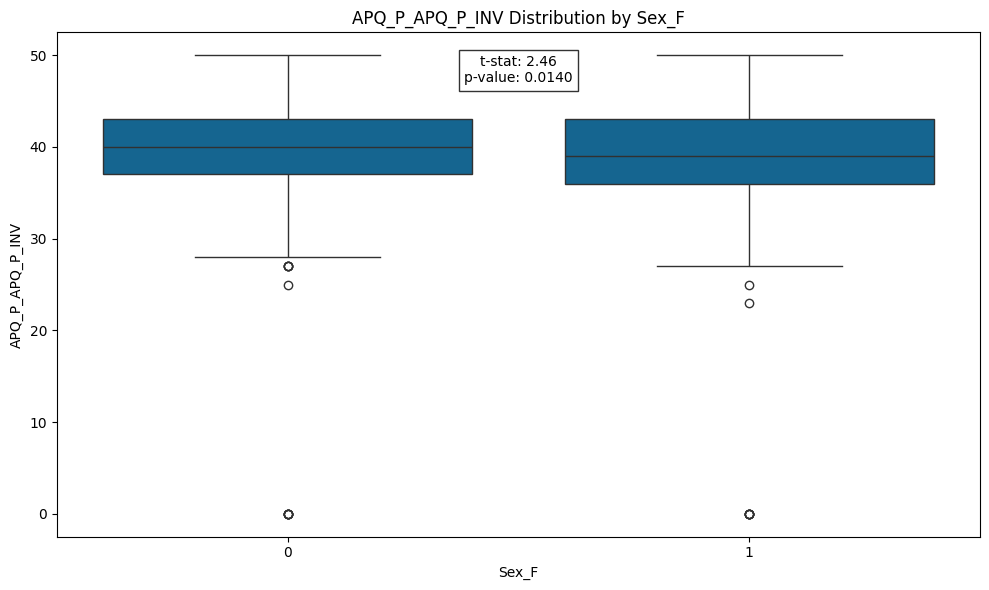

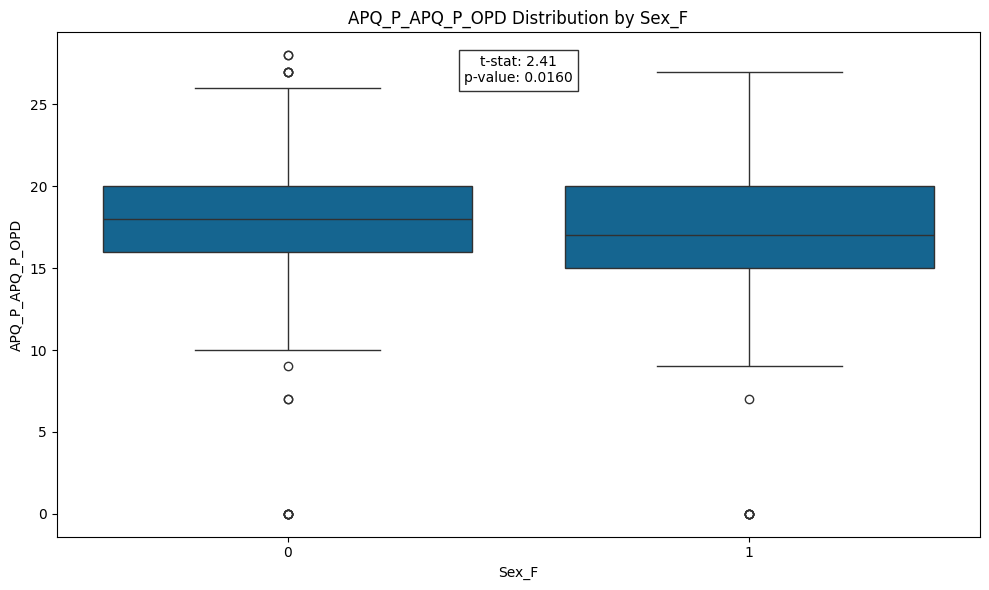

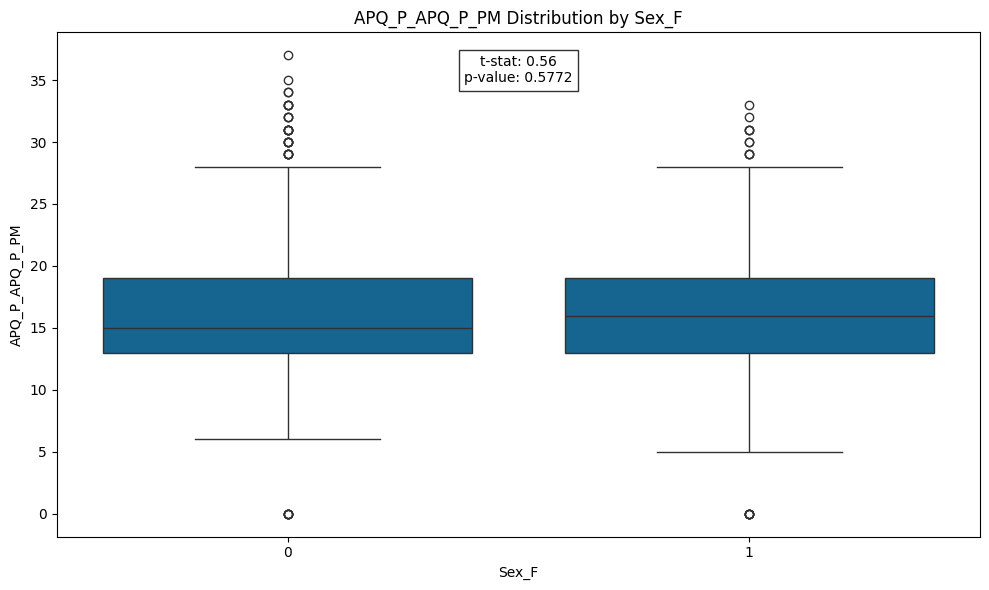

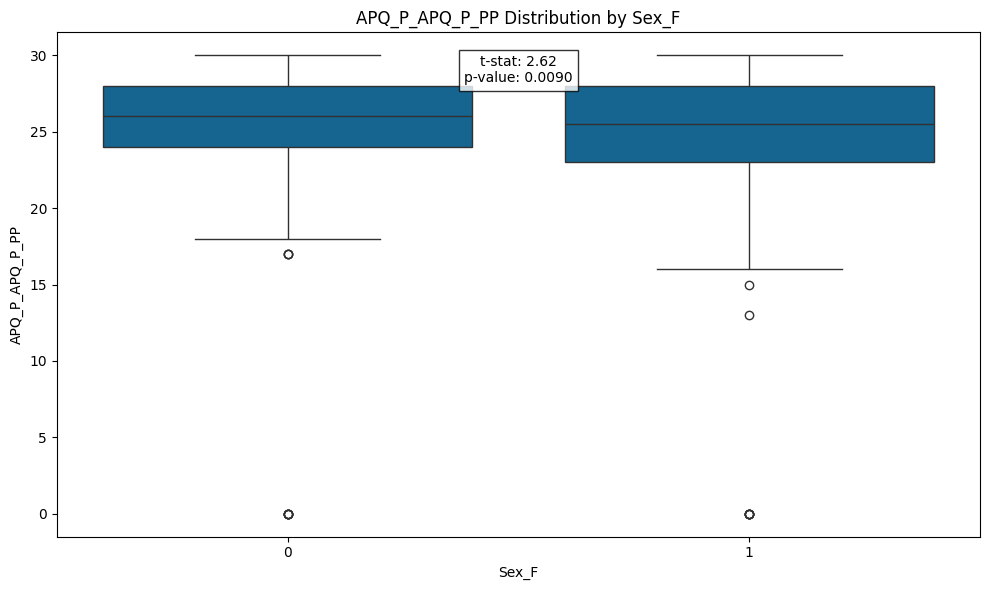

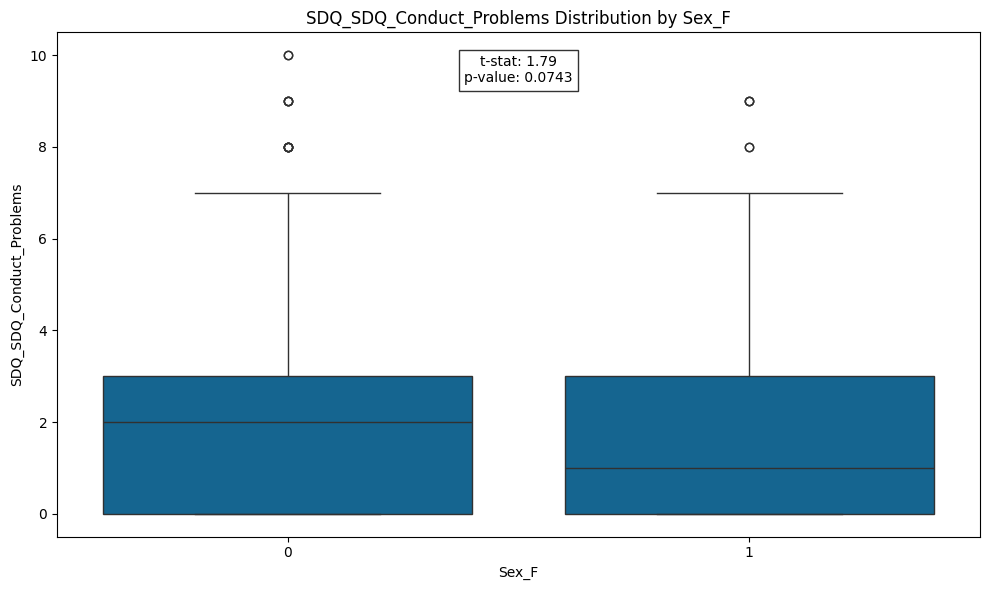

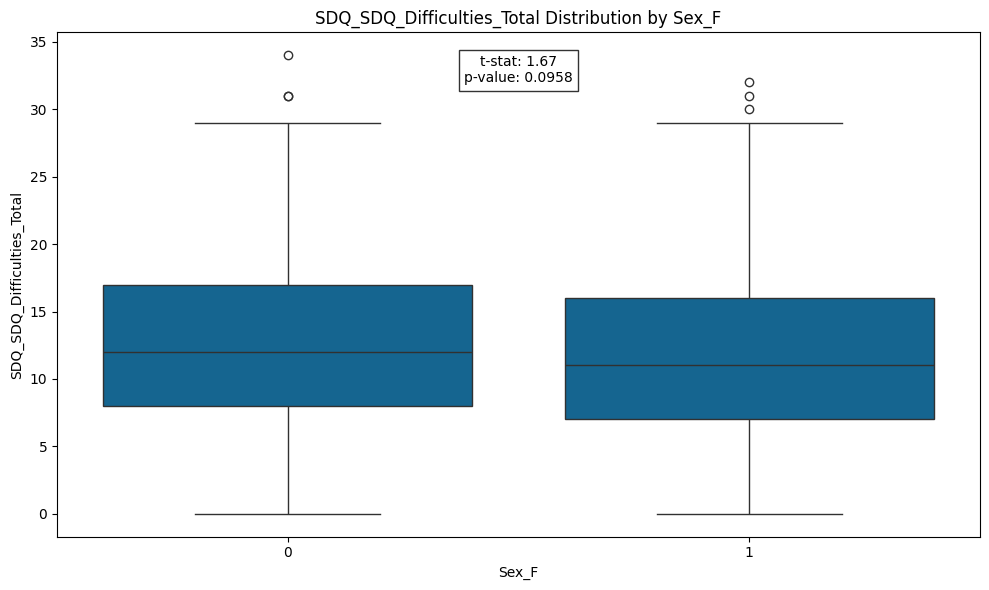

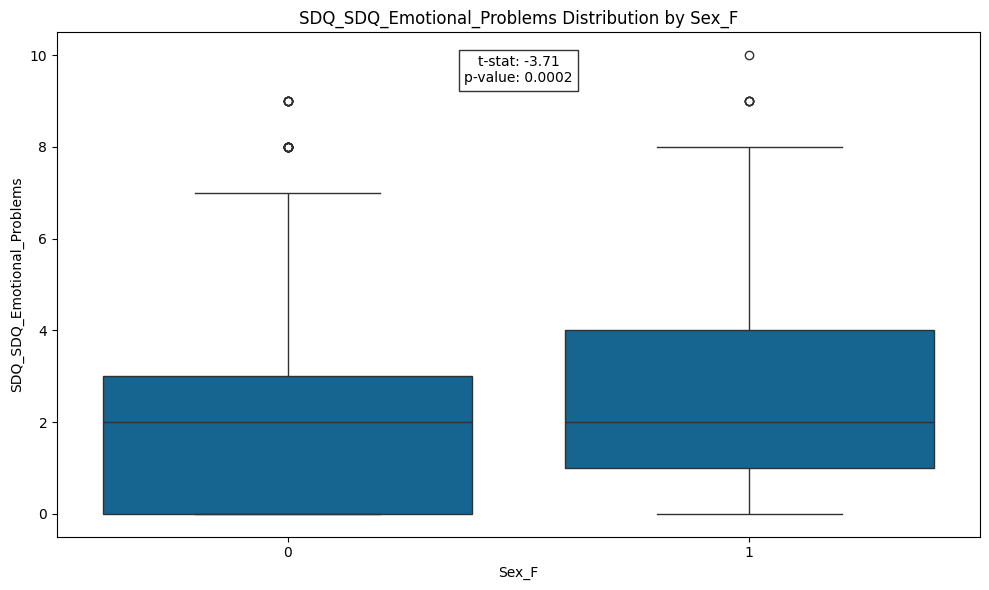

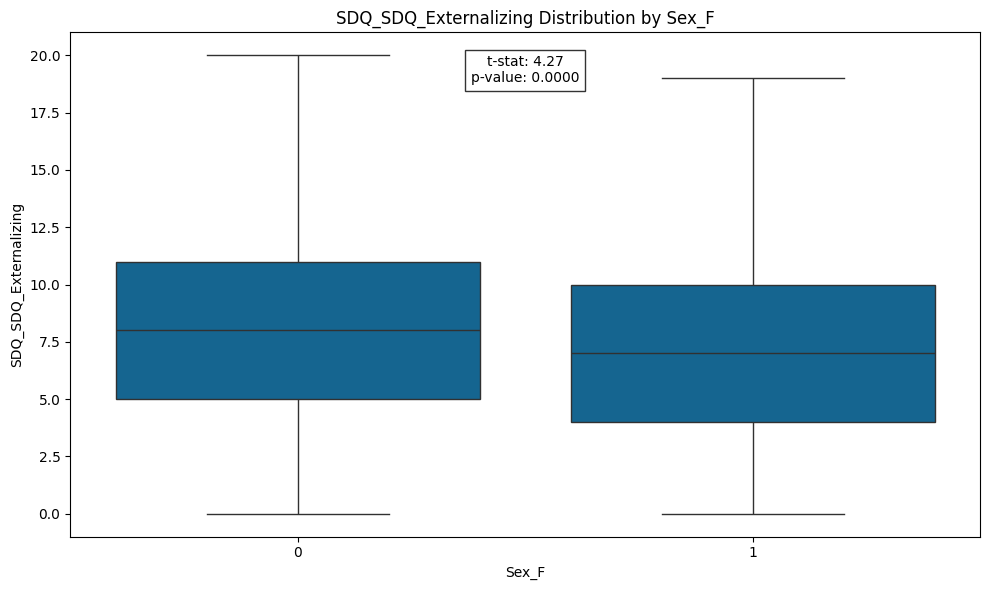

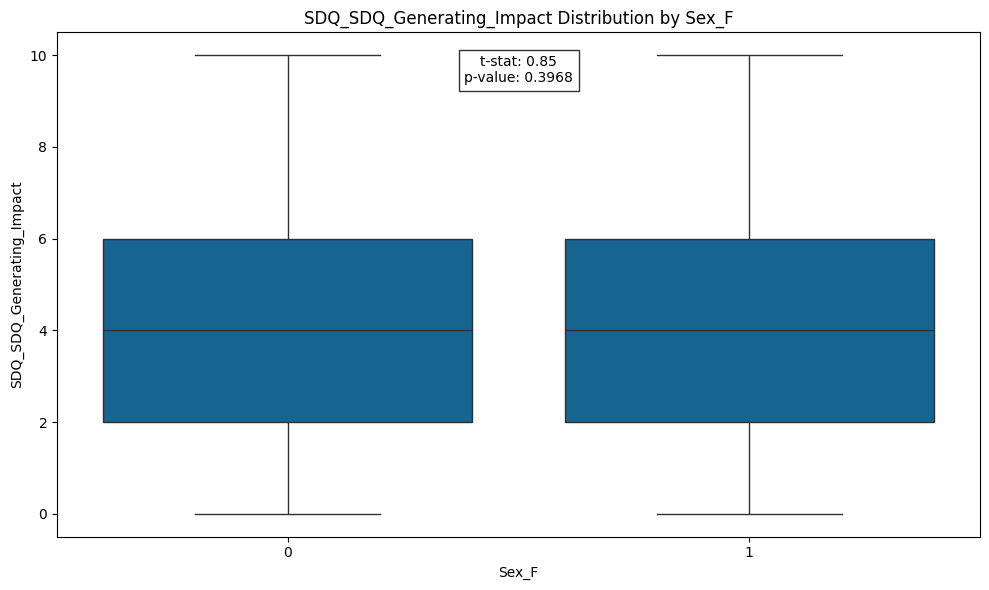

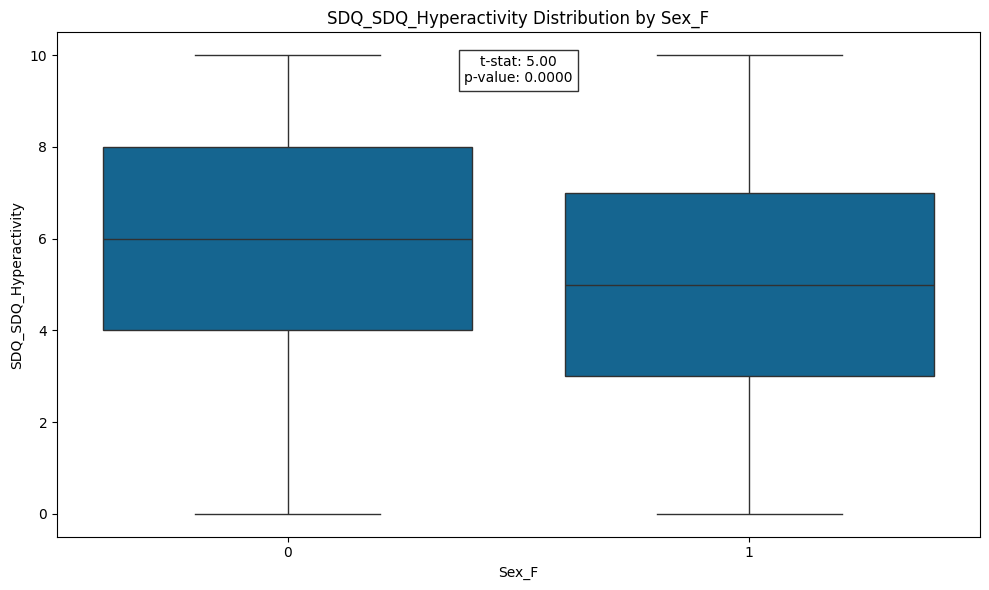

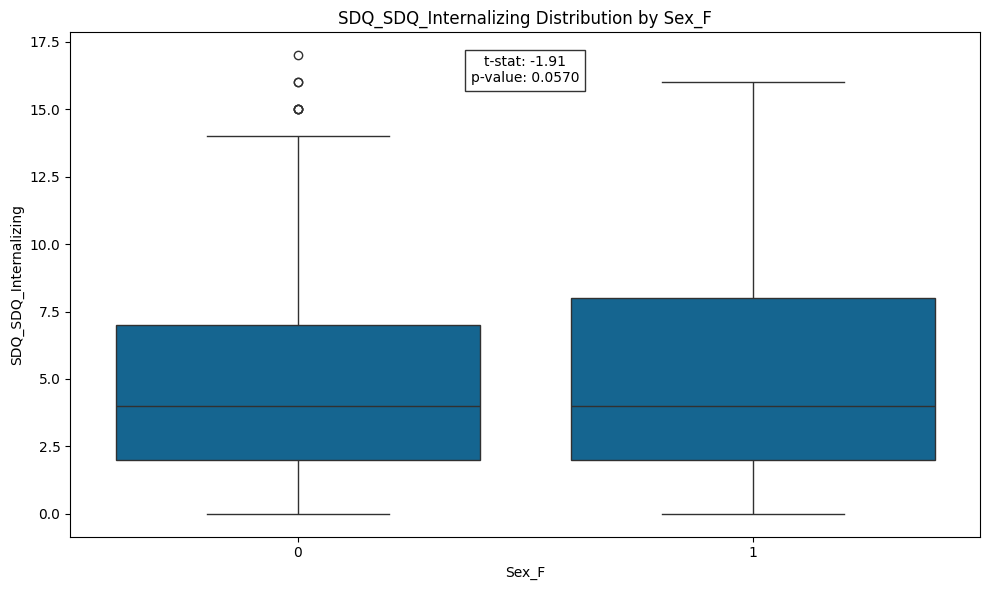

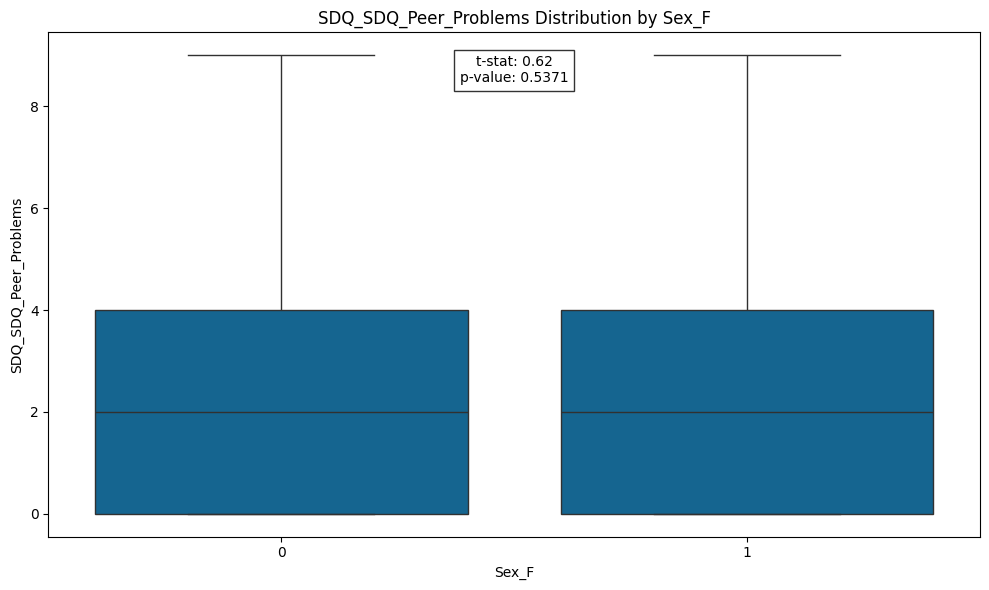

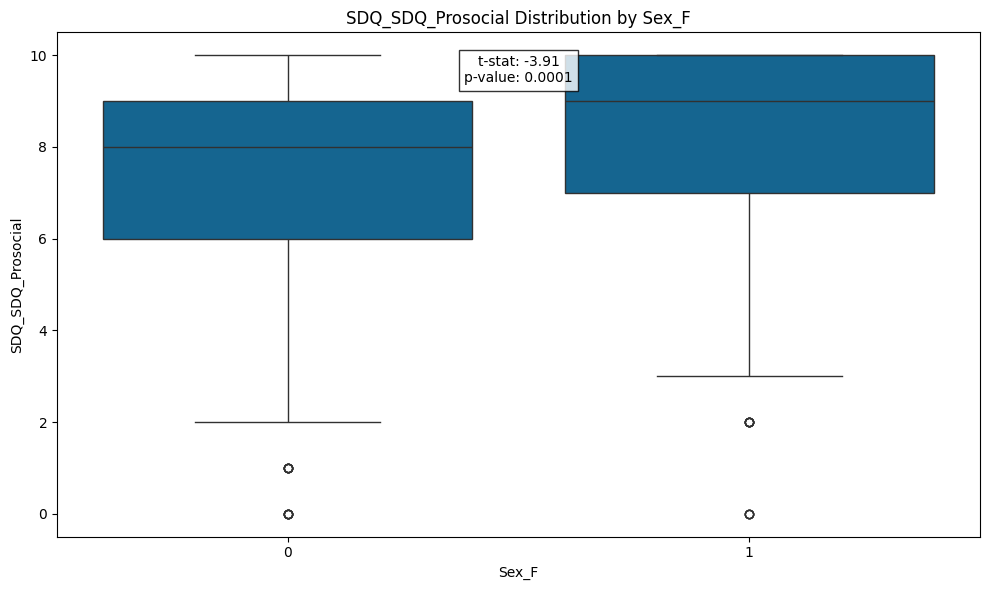

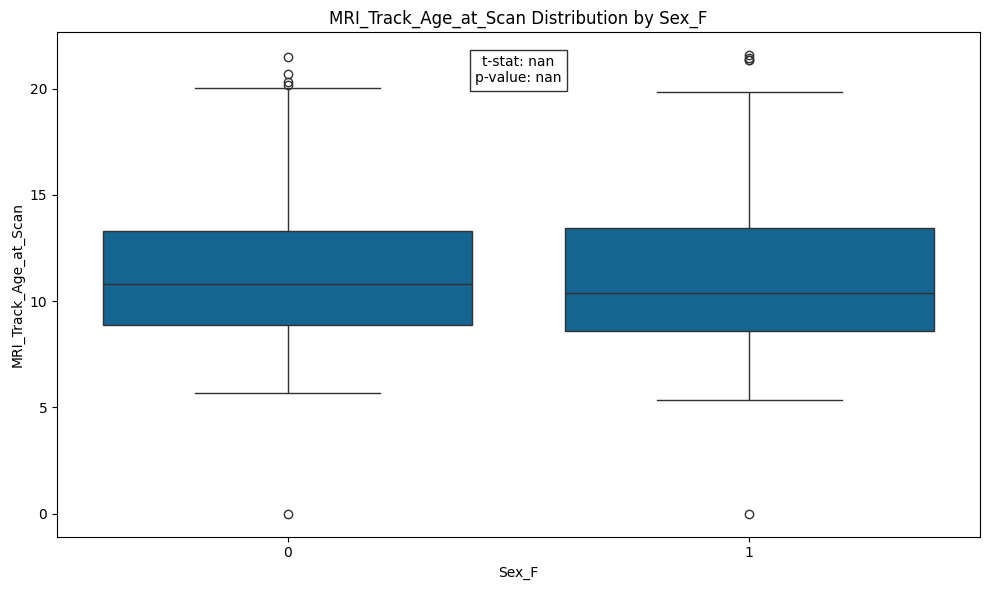

In [ ]:
bivariate_analysis(combined_data, continuous_features, target_variables)

## 4.4 Multivariate Analysis
- **What It Involves:**  
  - Computes a correlation matrix to measure relationships between all numerical features.
  - Plots a heatmap of the full correlation matrix to show relationships between all features.
  - Plots a heatmap of correlations with the target variable to highlight the most relevant features.
- **Why It’s Essential:**  
  - Helps prioritize features that are strongly correlated with the target variable, improving model performance.
  

---

Select only numeric columns from the DataFrame before computing the correlation matrix.

In [ ]:
train_df_no_connectome = combined_data.drop(columns=[col for col in combined_data.columns if 'throw_' in col or 'thcolumn_' in col])

# Display the first few rows of the new DataFrame
print(train_df_no_connectome.shape)

(1213, 30)


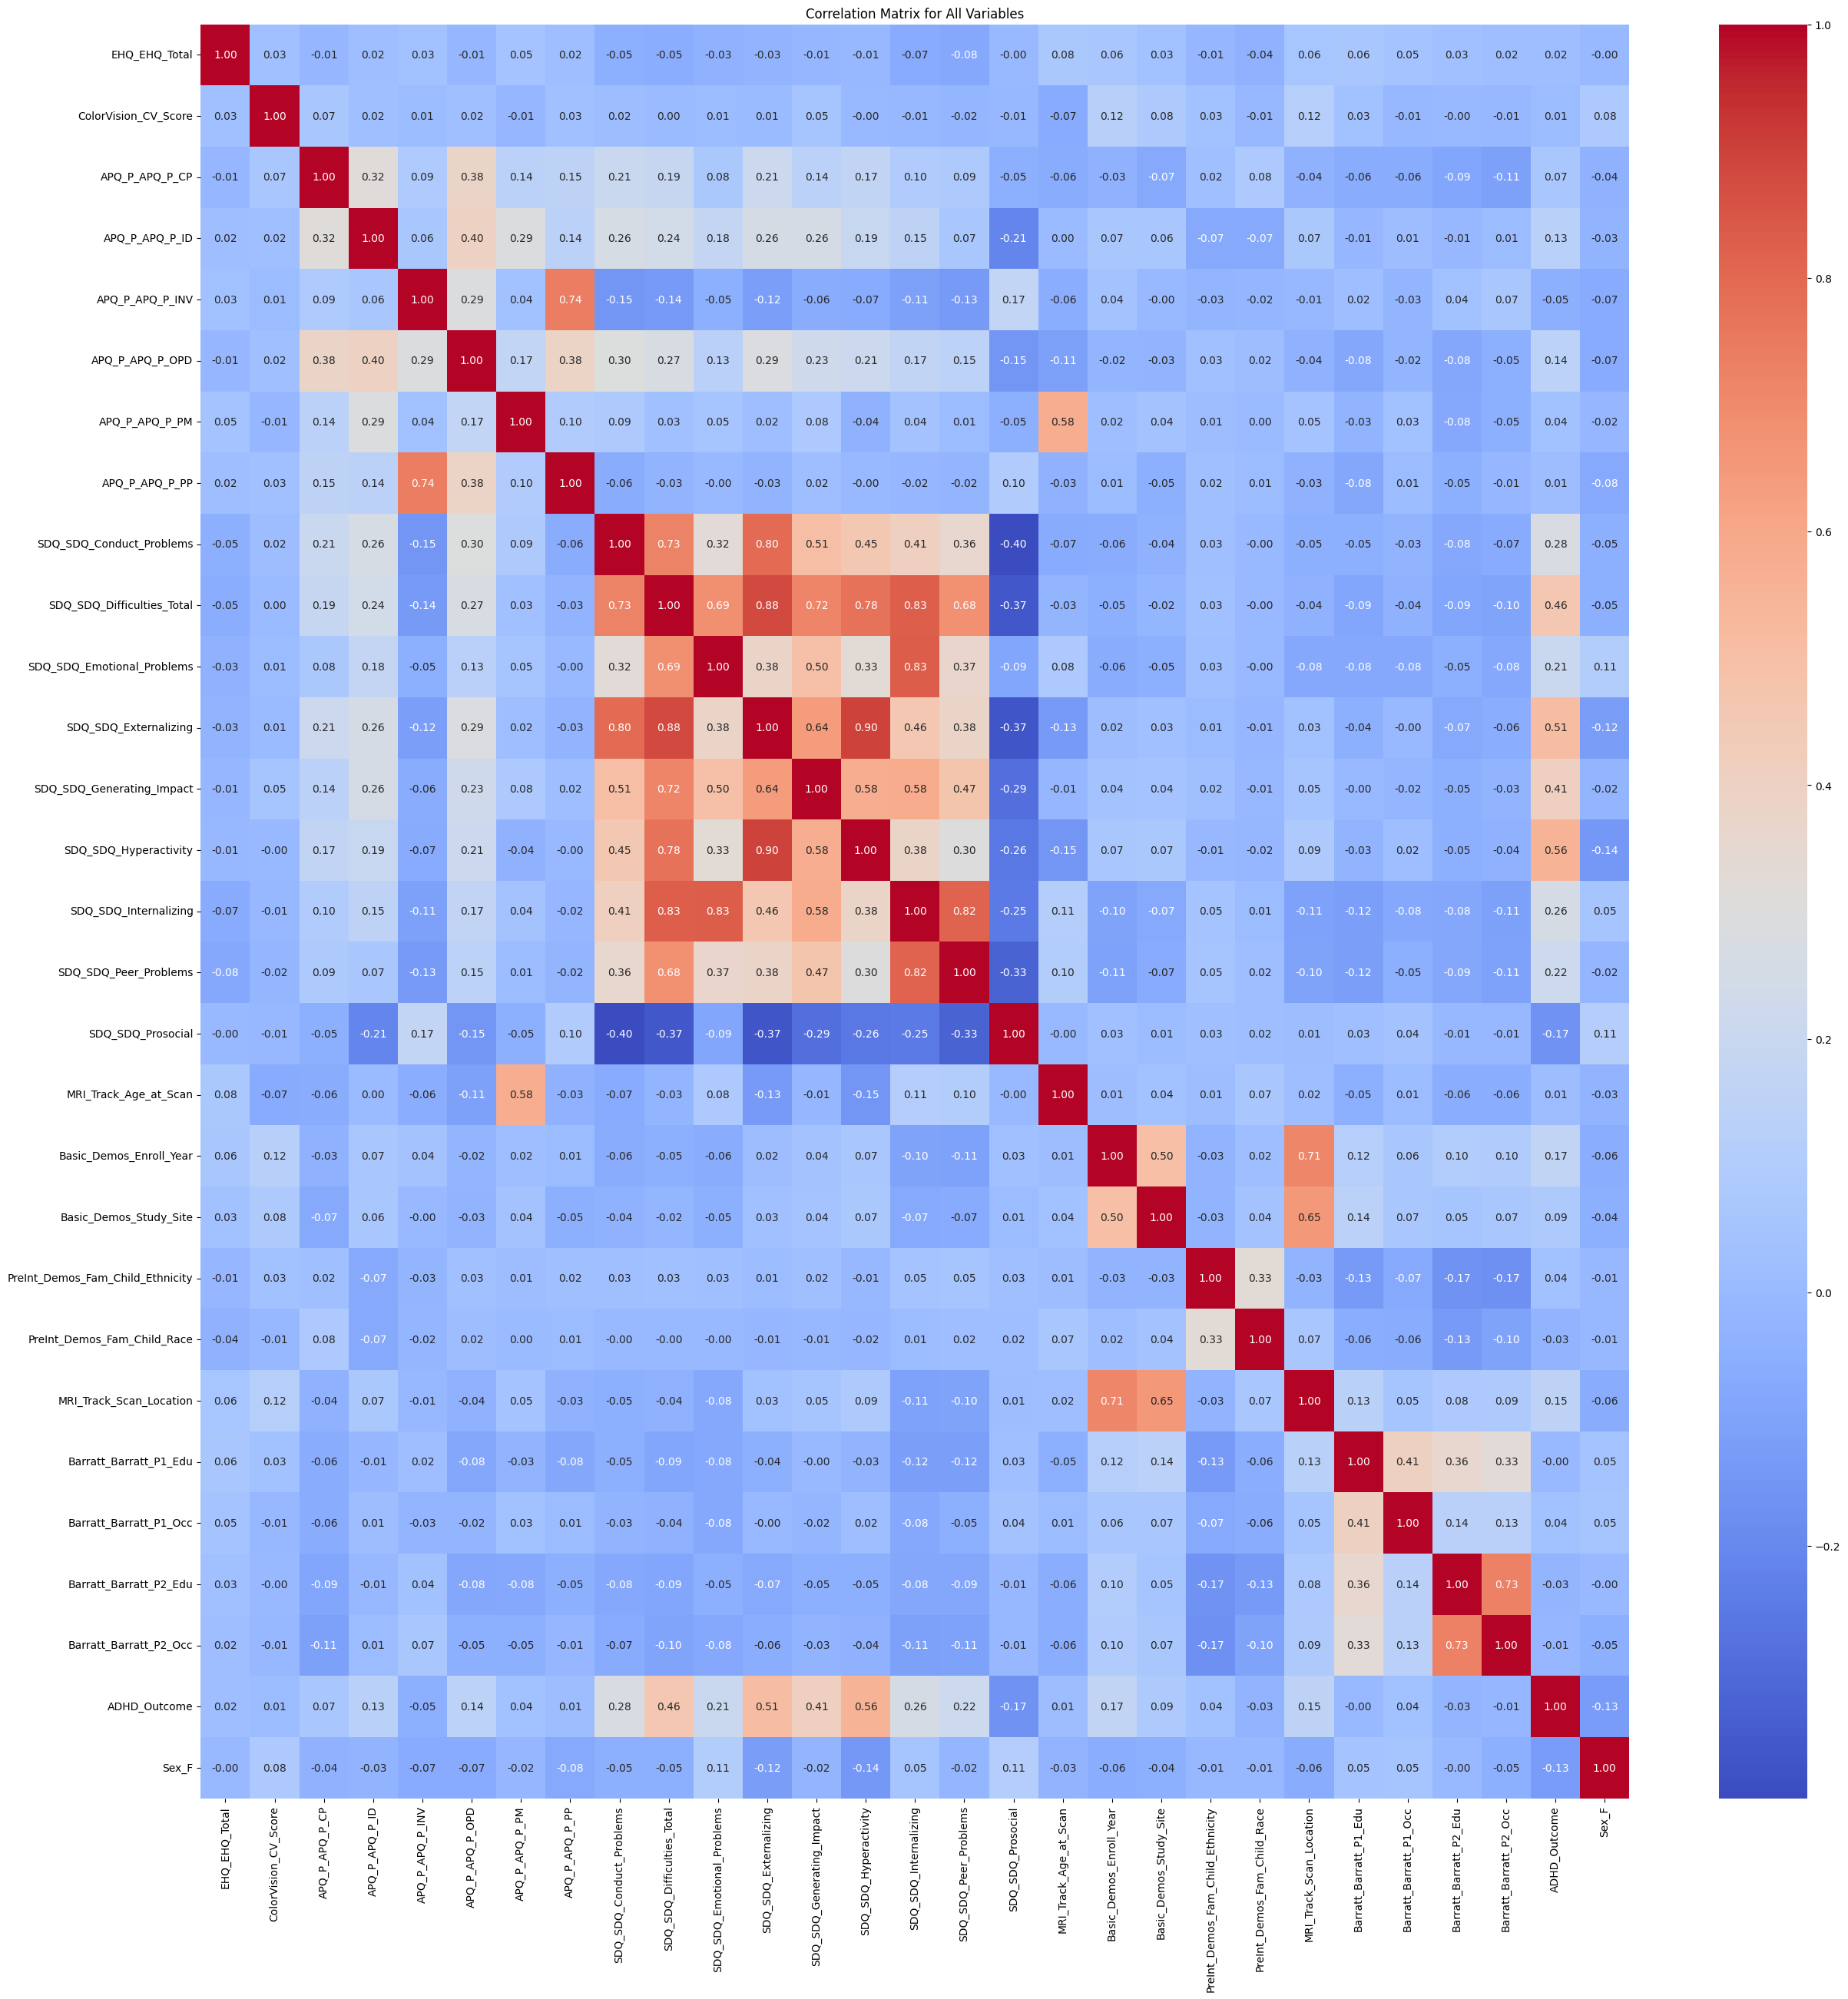

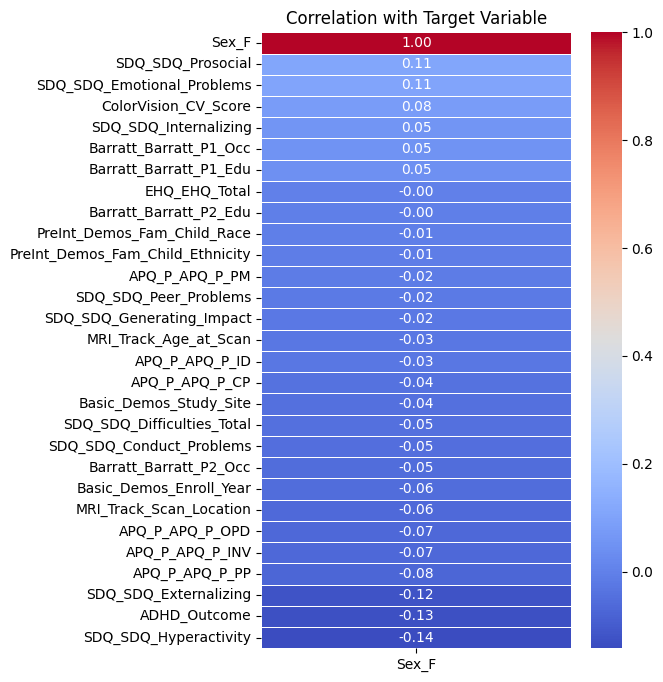

In [ ]:
train_df_no_connectome_no_id = train_df_no_connectome.drop(columns=['participant_id'])
# We first compute the correlation matrix
correlation_matrix = train_df_no_connectome_no_id.corr()

# Then we focus on correlations with the target variable 'Sex_F'
target_corr = correlation_matrix[['Sex_F']].sort_values(by='Sex_F', ascending=False)

# Then we plot the correlation matrix for all variables
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix for All Variables')
plt.show()

# Then we plot correlation with the target variable
plt.figure(figsize=(5, 8))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlation with Target Variable')
plt.show()

## 5 Feature Selection
- **What It Involves:**  
  - Feature selection is the process by which we select a subset of input features from the data for a model to reduce noise. We eliminate some of the available features in this process to get the best results from the model using minimum data and to ensure model explainability and simplicity.
  - Feature selection is crucial for improving model performance and interpretability by reducing noise and irrelevant variables.
- **Why It’s Essential:**  
  - The goal of feature selection is to find the best set of features from the available data that models the given problem to yield a machine learning model with good performance and robustness.
  - Feature selection also reduces model complexity, which helps avoid some of the common challenges in machine learning, such as the curse of dimensionality, computational efficiency, and model explainability.
  - Avoiding the feature selection process might lead to a suboptimal model with low performance and robustness, limited model explainability, and high computational requirements which lead to higher model latency in production settings.
- **Points to Note on Feature Selection:**
  - Dimensionality Reduction: Reducing the number of features can prevent overfitting and improve model generalization.
  - Handling Multicollinearity: Features that are highly correlated might not provide additional value to the model and can be removed.
  - Domain Knowledge: While statistical techniques help, domain knowledge can guide the selection of meaningful features.

Additional Information: https://www.geeksforgeeks.org/feature-selection-techniques-in-machine-learning/

---

### 5.1 Handling Missing Values
Here we impute the missing numerical values using the median.



**1. Why Impute with the Median?**
- **Robust to Outliers:** Unlike the mean, the median is less sensitive to extreme values, making it a better choice when the data contains outliers.
- **Preserves Distribution:** The median maintains the central tendency of skewed data, preventing distortions in the dataset.
- **Consistent Representation:** Ensures that missing values do not introduce bias, especially in non-normally distributed features.
- 📌 **Example:** If a numerical column has a right-skewed distribution (e.g., income data), using the mean could inflate the values, while the median provides a more stable replacement.

**2. Where did we use this later?**
- The dataset with imputed values was used for model training (X_train, y_train) and cross-validation.
- Without imputation, our models would have failed to train due to NaN values.


In [ ]:
# Checking missing values
missing_values = combined_data.isnull().sum()
print(missing_values[missing_values > 0])

# Impute missing numerical values using median
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy='median')
combined_data["MRI_Track_Age_at_Scan"] = num_imputer.fit_transform(combined_data[["MRI_Track_Age_at_Scan"]])

MRI_Track_Age_at_Scan               360
PreInt_Demos_Fam_Child_Ethnicity     11
dtype: int64


### 5.2 Identifying Highly Correlated Features
Here we identified the highly correlated features


**3. Why did we do this?**
- **Problem:** Highly correlated features contain redundant information, which adds noise and can make models less interpretable.
- **Solution:** We identified features with correlations above 0.85, helping us decide which variables to remove.

**4. Where did we use this later?**
- We used feature selection to reduce dataset dimensionality before training models like RandomForest, GradientBoosting, and LogisticRegression.
- This step improved model generalization by removing unnecessary complexity.

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Identify highly correlated features (threshold > 0.85)
thresh = 0.85
high_corr_features = [column for column in correlation_matrix.columns if any(correlation_matrix[column] > thresh)]
print("Highly Correlated Features:", high_corr_features)

Highly Correlated Features: ['EHQ_EHQ_Total', 'ColorVision_CV_Score', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP', 'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', 'ADHD_Outcome', 'Sex_F']


### 5.3  Selecting Important Features using Random Forest

**6. Why did we do this?**
- **Problem:** Our dataset had many variables, but not all were useful for predicting ADHD or Sex.
- **Solution:** We trained RandomForestClassifier to rank feature importance, then selected the top 15 features.

**7. Where did we use this later?**
- **Model Training:** We trained our final models (RandomForest, GradientBoosting, LogisticRegression, etc) only on selected features.
- **Cross-Validation:** We used selected_features for X_train and X_test, ensuring we only kept relevant predictors.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = combined_data.drop(columns=['participant_id', 'ADHD_Outcome', 'Sex_F'])
y = combined_data[['ADHD_Outcome', 'Sex_F']]

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y["ADHD_Outcome"])
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
selected_features = feature_importance.sort_values(ascending=False).head(15).index.tolist()
print("Selected Features:", selected_features)

Selected Features: ['SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Internalizing', '31throw_88thcolumn', 'SDQ_SDQ_Conduct_Problems', '53throw_83thcolumn', '74throw_159thcolumn', '72throw_112thcolumn', '116throw_119thcolumn', '26throw_117thcolumn', '90throw_120thcolumn', '67throw_197thcolumn', '35throw_179thcolumn']


## 6 Statistical Modelling

---

- **Multi-Outcome Model:**  
  - A machine learning model is a mathematical model that, after being trained on a dataset, can make predictions or classifications on new data by identifying patterns within the information.
  - Since this challenge is trying to answer the question: What brain activity patterns are associated with ADHD; are they different between males and females, and, if so, how?
  - Our predictions or target variables in this model are gender (1 = female, 0 = male) and ADHD diagnosis (1 = has ADHD, 0 = does not). Both are classification problems, meaning the outputs are binary: each prediction will either be 0 or 1, representing a boolean result.
  - To predict both target variables simultaneously, we will use a multi-outcome machine learning model. This type of model is designed to predict multiple dependent variables (or outcomes) at the same time, rather than one at a time. For this task, our Y_train dataset will include two target columns—gender and ADHD diagnosis. The predictions generated by your model, which you will submit to Kaggle, will also include these two variables. As a requirement for this challenge, you must use a multi-outcome model to produce predictions for both targets simultaneously.

- **Why use a Multi-Outcome model:**  
  - This approach is particularly relevant to our specific challenge of investigating ADHD diagnosis in women. Research suggests that women with ADHD are often underdiagnosed, and by modeling gender and ADHD diagnosis together, we can explore potential relationships between these variables. Using the same feature variables to predict both targets allows us to examine this connection in a systematic way. A multi-outcome model is ideal for this purpose because it efficiently handles the simultaneous prediction of both variables while leveraging any potential interdependencies between them.
 - Additionally, using a multi-outcome model streamlines the workflow. We only need to preprocess the data once, and we can train a single model instead of separate models for each target. This not only saves time and computational resources but also simplifies the overall process, making it easier to maintain consistency across predictions for gender and ADHD diagnosis.


### 6.1 Handling Imbalanced Data



**Our dataset has two target variables:**

- ADHD_Outcome (Binary: 0 = No ADHD, 1 = ADHD) → Imbalanced
- Sex_F (Binary: 0 = Male, 1 = Female) → Balanced or Slightly Imbalanced

**Why Use SMOTE?**

Since ADHD_Outcome is imbalanced, using a traditional model without addressing this imbalance could lead to biased predictions, where the model favors the majority class (No ADHD).

To counter this, we applied SMOTE (Synthetic Minority Oversampling Technique), which:
- Generates synthetic minority class examples rather than duplicating existing ones, helping prevent overfitting.
- Balances the class distribution, improving model fairness and accuracy.
- Ensures the classifier does not ignore the ADHD-positive cases, increasing sensitivity (recall).


**How SMOTE Was Applied**
- SMOTE was applied only to ADHD_Outcome since it does not support multi-output targets.
- The Sex_F feature remained unchanged to preserve its original distribution.
- After resampling, we reassigned Sex_F values by randomly sampling from the original dataset to maintain alignment with the new dataset.

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Reset index before applying SMOTE
combined_data_reset = combined_data.reset_index(drop=True)

# Apply SMOTE only to the ADHD_Outcome column
smote = SMOTE(random_state=42)
X_smote, y_adhd_smote = smote.fit_resample(combined_data_reset[selected_features], combined_data_reset['ADHD_Outcome'])

# Create new DataFrame for balanced ADHD_Outcome
y_balanced = pd.DataFrame({'ADHD_Outcome': y_adhd_smote})

# Reset index after SMOTE
X_smote = pd.DataFrame(X_smote, columns=selected_features).reset_index(drop=True)
y_balanced = y_balanced.reset_index(drop=True)

# Assign Sex_F by randomly sampling from the original distribution
y_balanced['Sex_F'] = combined_data_reset['Sex_F'].sample(n=len(y_balanced), replace=True).reset_index(drop=True)

# Ensure dimensions match
print("New Class Distribution for ADHD_Outcome:\n", y_balanced['ADHD_Outcome'].value_counts())
print("New Class Distribution for Sex_F:\n", y_balanced['Sex_F'].value_counts())


New Class Distribution for ADHD_Outcome:
 ADHD_Outcome
1    831
0    831
Name: count, dtype: int64
New Class Distribution for Sex_F:
 Sex_F
0    1050
1     612
Name: count, dtype: int64


**Code Breakdown**

**Step 1: Reset Index to Avoid Indexing Issues**
- Since combined_data has a mixture of categorical and numerical columns, we first reset the index to avoid mismatches when applying SMOTE.
 - combined_data_reset = combined_data.reset_index(drop=True)

**Step 2: Apply SMOTE Only on ADHD_Outcome**
- SMOTE generates synthetic samples to balance the minority class (ADHD_Outcome = 1).
- The new X_smote contains feature values for both real and synthetic ADHD cases.
- y_adhd_smote is the new balanced ADHD target variable.
  - smote = SMOTE(random_state=42)
X_smote, y_adhd_smote = smote.fit_resample(combined_data_reset[selected_features], combined_data_reset['ADHD_Outcome'])

**Step 3: Convert SMOTE Output to DataFrames and Reset Index**
- Since SMOTE creates synthetic data with new row indices, we need to reset the index so that everything aligns properly.
  - X_smote = pd.DataFrame(X_smote, columns=selected_features).reset_index(drop=True)
y_balanced = pd.DataFrame({'ADHD_Outcome': y_adhd_smote}).reset_index(drop=True)


**Step 4: Reassign Sex_F from the Original Data**
- Sex_F was not changed by SMOTE.
- Since the number of rows in y_balanced has increased after SMOTE, we randomly sample Sex_F values from the original dataset.
- This maintains the original gender distribution while ensuring alignment.
  - y_balanced['Sex_F'] = combined_data_reset['Sex_F'].sample(n=len(y_balanced), replace=True).reset_index(drop=True)

**Final Check: Validate Class Balance**
- This step confirms that ADHD_Outcome is now balanced and Sex_F preserves its original distribution.
  - print("New Class Distribution for ADHD_Outcome:\n", y_balanced['ADHD_Outcome'].value_counts())
print("New Class Distribution for Sex_F:\n", y_balanced['Sex_F'].value_counts())


**Why This Works?**
- Resetting the Index Before and After SMOTE ensures that X_smote and y_balanced align correctly.
- Sampling Sex_F Randomly since SMOTE only modifies ADHD_Outcome, we preserve the original distribution of Sex_F by random sampling with replacement.
- Avoiding Indexing Errors by resetting the index and treating data as a new DataFrame, we avoid mismatches that occur due to SMOTE-generated synthetic samples.

### 6.2 Splitting Data for Training and Testing

For any machine learning model, you need an X_train dataset, which contains the feature variables used to make predictions about the target variables—in this case, ADHD diagnosis and gender. Our feature variables include categorical columns, quantitative variables, and functional connectome matrices. We have prepared our X_train dataframe by encoding categorical variables, merging dataframes, and handling missing values by filling in NAs.

In addition to X_train, we also need Y_train, the dataset containing the target variables, to train the model. The target variables allow the model to learn the patterns in the feature variables that lead to specific outcomes for ADHD diagnosis and gender. This relationship is what enables the model to make accurate predictions when applied to new data.

In [ ]:
from sklearn.model_selection import train_test_split

# Ensure X and y are correctly assigned
X_balanced = X_smote  # Features from SMOTE
y_balanced = y_balanced.reset_index(drop=True)  # Reset index to prevent errors

# Split dataset while stratifying on ADHD_Outcome
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced['ADHD_Outcome']
)

# Verify distribution of ADHD_Outcome in training and test sets
print("Train ADHD_Outcome Distribution:\n", y_train['ADHD_Outcome'].value_counts(normalize=True))
print("Test ADHD_Outcome Distribution:\n", y_test['ADHD_Outcome'].value_counts(normalize=True))

# Verify distribution of Sex_F in training and test sets
print("Train Sex_F Distribution:\n", y_train['Sex_F'].value_counts(normalize=True))
print("Test Sex_F Distribution:\n", y_test['Sex_F'].value_counts(normalize=True))


Train ADHD_Outcome Distribution:
 ADHD_Outcome
1    0.500376
0    0.499624
Name: proportion, dtype: float64
Test ADHD_Outcome Distribution:
 ADHD_Outcome
0    0.501502
1    0.498498
Name: proportion, dtype: float64
Train Sex_F Distribution:
 Sex_F
0    0.634312
1    0.365688
Name: proportion, dtype: float64
Test Sex_F Distribution:
 Sex_F
0    0.621622
1    0.378378
Name: proportion, dtype: float64


**What This Means - ADHD_Outcome Results ?**
- ADHD was originally imbalanced, but SMOTE successfully balanced the classes before splitting.
- Training and test distributions are very close (~50-50 split), ensuring a fair model evaluation.
- Stratification worked correctly, preserving the ADHD class proportions.

- Good Outcome: No bias introduced due to imbalanced classes.

**What This Means - Sex_F Results ?**
- Unlike ADHD, the Sex_F feature remains imbalanced (more males than females).
- Test set has even fewer females (31.5%) than the training set (35.6%) → Slight distribution shift.
- Stratification was only applied to ADHD_Outcome, not Sex_F, so its natural imbalance remained.
- Potential Issue: The model may be biased toward predicting the majority class (Males).
- **Solution:** Consider balancing Sex_F using SMOTE or weighting classes during training.

### 6.3 Training a Multi-Outcome Model

Here we simply trained the model using Random Forest, Gradient Booasting, XGBoosting, CatBoost and Logistic Regression

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Ensure y_train is in the correct format (DataFrame)
y_train = y_train.astype(int)  # Ensure binary classification labels are integers

# Define models to use
models = {
    "RandomForest": MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42)),
    "GradientBoosting": MultiOutputClassifier(GradientBoostingClassifier(n_estimators=100, random_state=42)),
    "XGBoost": MultiOutputClassifier(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    "CatBoost": MultiOutputClassifier(CatBoostClassifier(verbose=0, random_state=42)),
    "LogisticRegression": MultiOutputClassifier(LogisticRegression(max_iter=1000))
}

# Train and evaluate multiple models
model_predictions = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test set
    y_pred_df = pd.DataFrame(y_pred, columns=['ADHD_Outcome', 'Sex_F'])  # Convert to DataFrame
    model_predictions[model_name] = y_pred_df
    print(f"{model_name} Training Complete.")

# Display sample predictions from each model
print("\n=== Sample Predictions from Each Model ===")
for model_name, y_pred_df in model_predictions.items():
    print(f"\n{model_name} Predictions Sample:")
    print(y_pred_df.head())  # Show first 5 predictions



Training RandomForest...
RandomForest Training Complete.

Training GradientBoosting...
GradientBoosting Training Complete.

Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:35:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:35:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Training Complete.

Training CatBoost...
CatBoost Training Complete.

Training LogisticRegression...
LogisticRegression Training Complete.

=== Sample Predictions from Each Model ===

RandomForest Predictions Sample:
   ADHD_Outcome  Sex_F
0             0      1
1             0      1
2             1      0
3             0      1
4             1      0

GradientBoosting Predictions Sample:
   ADHD_Outcome  Sex_F
0             0      0
1             0      1
2             1      0
3             0      0
4             1      0

XGBoost Predictions Sample:
   ADHD_Outcome  Sex_F
0             0      1
1             0      1
2             1      1
3             0      1
4             1      1

CatBoost Predictions Sample:
   ADHD_Outcome  Sex_F
0             0      1
1             0      1
2             1      0
3             0      0
4             1      0

LogisticRegression Predictions Sample:
   ADHD_Outcome  Sex_F
0             0      0
1             0      0
2             1  

## 7 Model Evaluation

Evaluation is always good in any field, right?

In the case of machine learning, it is best practice.

The evaluation metrics used were
- Precision
- Recall (Sensitivity)
- F1-Score

**Why Were These Metrics Used?**

**ADHD Classification:**

- Recall is crucial: We don’t want to miss true ADHD cases.
- F1-score is important: Since the dataset was originally imbalanced, F1-score helps balance precision & recall.

**Sex Classification:**

- Precision matters: Since males dominate the dataset, we need to ensure females aren’t misclassified.
- F1-score helps detect bias: If one class has low recall, the F1-score will reflect that.

### 7.1 Evaluating Classification Performance

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Loop through each model's predictions and generate evaluation reports
for model_name, y_pred_df in model_predictions.items():
    print(f"\n=== {model_name} Evaluation ===")

    # Ensure y_pred is a DataFrame
    y_pred_df = pd.DataFrame(y_pred_df, columns=['ADHD_Outcome', 'Sex_F'])

    # ADHD Classification Report
    print("\nADHD Diagnosis Classification Report:")
    print(classification_report(y_test['ADHD_Outcome'], y_pred_df['ADHD_Outcome']))

    # Sex Classification Report
    print("\nSex Classification Report:")
    print(classification_report(y_test['Sex_F'], y_pred_df['Sex_F']))

    print("=" * 50)  # Separator for readability



=== RandomForest Evaluation ===

ADHD Diagnosis Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       167
           1       0.85      0.77      0.81       166

    accuracy                           0.82       333
   macro avg       0.82      0.82      0.82       333
weighted avg       0.82      0.82      0.82       333


Sex Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.88      0.73       207
           1       0.40      0.13      0.19       126

    accuracy                           0.60       333
   macro avg       0.51      0.51      0.46       333
weighted avg       0.54      0.60      0.53       333


=== GradientBoosting Evaluation ===

ADHD Diagnosis Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       167
           1       0.81      0.75      0.78       166

    ac

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Review Slides for Interpretation of the Results**

### 7.2 Applying Cross-Validation


The cross-validation score is a metric used to evaluate the performance of a machine learning model by testing it on multiple subsets of the data. It provides an estimate of how well the model is likely to generalize to unseen data.

How Cross-Validation Works:


*   The dataset is divided into 𝑘 equally-sized subsets or folds.
*   The model is trained on k - 1 folds (the training set) and evaluated on the remaining fold (the validation set)
* This process is repeated k times, with each fold being used once as the validation set
* The evaluation metric, we will use accuracy is computed for each iteration

Why are we using cross-validation score:

*  Cross-validation ensures that a model is evaluated on multiple subsets of the data

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Define models
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000)
}

# Dictionary to store cross-validation scores
cv_results = {}

# Apply cross-validation for each model and each target variable separately
for model_name, model in models.items():
    print(f"\nPerforming Cross-Validation for {model_name}...")

    # ADHD Outcome Cross-Validation
    adhd_cv_scores = cross_val_score(model, X_balanced, y_balanced['ADHD_Outcome'], cv=5, scoring='f1_micro')
    adhd_cv_mean = np.mean(adhd_cv_scores)

    # Sex Classification Cross-Validation
    sex_cv_scores = cross_val_score(model, X_balanced, y_balanced['Sex_F'], cv=5, scoring='f1_micro')
    sex_cv_mean = np.mean(sex_cv_scores)

    # Store results
    cv_results[model_name] = {
        "ADHD_F1_CV": adhd_cv_mean,
        "Sex_F1_CV": sex_cv_mean
    }

    print(f"{model_name} - ADHD Outcome F1 Score (CV): {adhd_cv_mean:.4f}")
    print(f"{model_name} - Sex Classification F1 Score (CV): {sex_cv_mean:.4f}")

# Print summarized cross-validation results
print("\n=== Cross-Validation Results Summary ===")
for model, scores in cv_results.items():
    print(f"{model}: ADHD F1-CV = {scores['ADHD_F1_CV']:.4f}, Sex F1-CV = {scores['Sex_F1_CV']:.4f}")



Performing Cross-Validation for RandomForest...
RandomForest - ADHD Outcome F1 Score (CV): 0.8387
RandomForest - Sex Classification F1 Score (CV): 0.5920

Performing Cross-Validation for GradientBoosting...
GradientBoosting - ADHD Outcome F1 Score (CV): 0.8020
GradientBoosting - Sex Classification F1 Score (CV): 0.5902

Performing Cross-Validation for LogisticRegression...
LogisticRegression - ADHD Outcome F1 Score (CV): 0.8063
LogisticRegression - Sex Classification F1 Score (CV): 0.6318

=== Cross-Validation Results Summary ===
RandomForest: ADHD F1-CV = 0.8387, Sex F1-CV = 0.5920
GradientBoosting: ADHD F1-CV = 0.8020, Sex F1-CV = 0.5902
LogisticRegression: ADHD F1-CV = 0.8063, Sex F1-CV = 0.6318


## 8 Creating a Submission File for WiDS Datathon 2025

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

# **Step 1: Select the Best Model**
best_classifier = models["RandomForest"]  # Change to "GradientBoosting" or "LogisticRegression" if needed
best_model = MultiOutputClassifier(best_classifier)

# **Step 2: Train on the Full Training Dataset**
best_model.fit(X, y)

# **Step 3: Prepare Test Data**
X_test_preprocessed = combined_test_data.drop(['participant_id'], axis=1)  # Drop participant_id

# **Step 4: Predict on Test Data**
test_predictions = best_model.predict(X_test_preprocessed)

# **Step 5: Convert Predictions to a DataFrame**
submission_df = pd.DataFrame(
    test_predictions,
    columns=['ADHD_Outcome', 'Sex_F']
)
submission_df['participant_id'] = combined_test_data['participant_id']
submission_df = submission_df[['participant_id', 'ADHD_Outcome', 'Sex_F']]  # Ensure correct column order

# **Step 6: Save CSV File for Kaggle Submission**
submission_file = "submission.csv"
submission_df.to_csv(submission_file, index=False)

print(f"✅ Submission file saved as {submission_file}")


✅ Submission file saved as submission.csv


In [ ]:
submission_df.head()

,participant_id,ADHD_Outcome,Sex_F
0,Cfwaf5FX7jWK,1,1
1,vhGrzmvA3Hjq,0,1
2,ULliyEXjy4OV,0,0
3,LZfeAb1xMtql,0,1
4,EnFOUv0YK1RG,0,0


#Notebook Authors

This notebook was authored by:
- Nicholas Smith
- Lesley-Ann Jurawan
- Malini Ramberran
- Julie Koon Koon